In [185]:
# Data manipulation
import pandas as pd
import numpy as np
from math import pi

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import pyplot
from matplotlib.colors import to_rgba 
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

# ML Libraries
from sklearn.metrics import classification_report,confusion_matrix,f1_score,accuracy_score, roc_auc_score, roc_curve, recall_score, precision_score
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split,cross_val_score, learning_curve  
from sklearn.linear_model import LogisticRegression
import xgboost as xgb

###  Descripción del Dataset

El dataset consiste en un conjunto de **19 parámetros** calculados a partir de registros de campañas pasadas asociadas al cliente. Estas variables recogen distintas características del cliente, desde su edad, estado civil, educación, así como información asociada a la cuenta.

#### 🏦 **Datos del Cliente Bancario**
- **`age`**: Edad del cliente (numérico).  
- **`job`**: Tipo de trabajo (categórico).  
  - Valores: **admin.**, **blue-collar**, **entrepreneur**, **housemaid**, **management**, **retired**, **self-employed**, **services**, **student**, **technician**, **unemployed**, **unknown**.  
- **`marital_status`**: Estado civil (categórico).  
  - Valores: **divorced**, **married**, **single**, **unknown** (Nota: **divorced** incluye divorciados y viudos).  
- **`education_level`**: Nivel de educación (categórico).  
  - Valores: **basic.4y**, **basic.6y**, **basic.9y**, **high.school**, **illiterate**, **professional.course**, **university.degree**, **unknown**.  
- **`is_default`**: ¿Tiene crédito en impago? (categórico).  
  - Valores: **no**, **yes**, **unknown**.  
- **`housing_type`**: ¿Tiene préstamo hipotecario? (categórico).  
  - Valores: **no**, **yes**, **unknown**.  
- **`loan`**: ¿Tiene préstamo personal? (categórico).  
  - Valores: **no**, **yes**, **unknown**.  

#### 📞 **Datos del Último Contacto de la Campaña Actual**
- **`contact`**: Tipo de comunicación (categórico).  
  - Valores: **cellular**, **telephone**.  
- **`month`**: Mes del último contacto (categórico).  
  - Valores: **jan**, **feb**, **mar**, …, **nov**, **dec**.  
- **`day_of_week`**: Día de la semana del último contacto (categórico).  
  - Valores: **mon**, **tue**, **wed**, **thu**, **fri**.  

#### 🔄 **Otros Atributos**
- **`campaign`**: Número de contactos realizados durante esta campaña (numérico).  
- **`pdays`**: Días transcurridos desde el último contacto en una campaña anterior (numérico; **999** significa que no fue contactado previamente).  
- **`previous`**: Número de contactos previos a esta campaña (numérico).  
- **`poutcome`**: Resultado de la campaña de marketing anterior (categórico).  
  - Valores: **failure**, **nonexistent**, **success**.  

#### 📈 **Atributos del Contexto Económico y Social**
- **`emp_var_rate`**: Tasa de variación del empleo - indicador trimestral (numérico).  
- **`cons_price_index`**: Índice de precios al consumidor - indicador mensual (numérico).  
- **`cons_conf_index`**: Índice de confianza del consumidor - indicador mensual (numérico).  
- **`euribor_3m`**: Tasa Euribor a 3 meses - indicador diario (numérico).  
- **`n_employed`**: Número de empleados - indicador trimestral (numérico).  

---

### 🎯 **Variable de Salida (Objetivo)**
- **`output`**: ¿El cliente ha suscrito un depósito a plazo? (binario).  
  - Valores: **yes**, **no**.  


In [186]:
df = pd.read_csv('train.csv').drop('id', axis=1)
df.head()

,age,job,marital_status,education_level,is_default,housing_type,loan,contact,month,day_of_week,campaing,pdays,previous,poutcome,emp_var_rate,cons_price_index,cons_conf_index,euribor_3m,n_employed,output
0,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1000,93.9940,-36.4000,4.8570,5191.0000,0
1,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1000,93.9940,-36.4000,4.8570,5191.0000,0
2,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1000,93.9940,-36.4000,4.8570,5191.0000,0
3,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1000,93.9940,-36.4000,4.8570,5191.0000,0
4,59,admin.,married,professional.course,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1000,93.9940,-36.4000,4.8570,5191.0000,0


In [187]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33108 entries, 0 to 33107
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               33108 non-null  int64  
 1   job               33108 non-null  object 
 2   marital_status    33108 non-null  object 
 3   education_level   33108 non-null  object 
 4   is_default        33108 non-null  object 
 5   housing_type      33108 non-null  object 
 6   loan              33108 non-null  object 
 7   contact           33108 non-null  object 
 8   month             33108 non-null  object 
 9   day_of_week       33108 non-null  object 
 10  campaing          33108 non-null  int64  
 11  pdays             33108 non-null  int64  
 12  previous          33108 non-null  int64  
 13  poutcome          33108 non-null  object 
 14  emp_var_rate      33108 non-null  float64
 15  cons_price_index  33108 non-null  float64
 16  cons_conf_index   33108 non-null  float6

### Distribución del `output`
- Valores: `"yes"`, `"no"`.

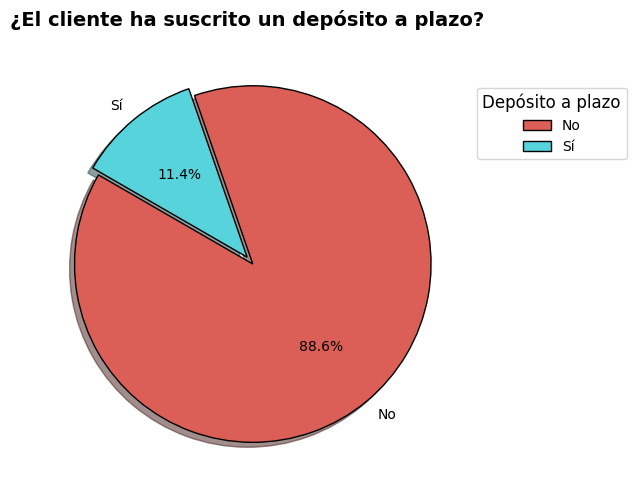

In [188]:
# Calcular la distribución de 'output'
output_distribution = df["output"].value_counts(normalize=True) * 100


# Renombrar las etiquetas de los valores
labels = ['Sí' if val == 1 else 'No' for val in output_distribution.index]

# Crear el gráfico de pastel
plt.figure(figsize=(9, 5))
colors = sns.color_palette("hls", len(output_distribution))
explode = (0.05, 0) 

wedges, texts, autotexts = plt.pie(
    output_distribution, 
    labels=labels, 
    autopct='%1.1f%%', 
    startangle=150,
    shadow=True,
    colors=colors,
    explode=explode,
    wedgeprops={'edgecolor': 'black', 'linewidth': 1}
)

# Título del gráfico
plt.title('¿El cliente ha suscrito un depósito a plazo?', fontsize=14, fontweight='bold')

# Crear la leyenda y posicionarla fuera del gráfico
plt.legend(wedges, labels, title='Depósito a plazo', title_fontsize='12', loc='center left', bbox_to_anchor=(1, 0.8))

# Mostrar el gráfico
plt.tight_layout()
plt.show()

---

## 🧑 Descripción del Cliente y Variables Categóricas 


---

In [189]:
dfcategory = df.select_dtypes(include=['object'])
dfcategory.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33108 entries, 0 to 33107
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   job              33108 non-null  object
 1   marital_status   33108 non-null  object
 2   education_level  33108 non-null  object
 3   is_default       33108 non-null  object
 4   housing_type     33108 non-null  object
 5   loan             33108 non-null  object
 6   contact          33108 non-null  object
 7   month            33108 non-null  object
 8   day_of_week      33108 non-null  object
 9   poutcome         33108 non-null  object
dtypes: object(10)
memory usage: 2.5+ MB


### Distribución del tipo de contacto y frecuencía:

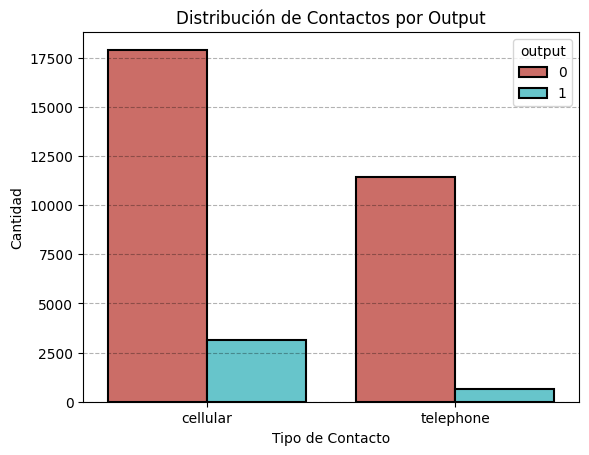

In [190]:
# Crear el gráfico de conteo
sns.countplot(
    x='contact', 
    data=df, 
    hue='output', 
    linewidth=1.5, 
    edgecolor='black', 
    palette='hls',
    order=df['contact'].value_counts().index
)

# Mostrar el gráfico
plt.title('Distribución de Contactos por Output')
plt.xlabel('Tipo de Contacto')
plt.ylabel('Cantidad')
plt.grid(axis="y", linestyle='--',color="black", alpha=0.3)
plt.show()


#### Mean encoding del tipo de contacto

In [191]:
def contact_type(x):
    if x == 'cellular':
        return 1
    else:
        return 0   
df["contact_encoded"] = df["contact"].apply(contact_type)
group_contact = df.groupby("contact_encoded")["output"].mean()
df["contact_encoded"] = df["contact_encoded"].map(group_contact)

df["contact_encoded"].value_counts() 

contact_encoded
0.1487    21029
0.0527    12079
Name: count, dtype: int64

### Distribución del output por **Job**

In [192]:
df["job"].value_counts()

job
admin.           8402
blue-collar      7375
technician       5444
services         3173
management       2357
retired          1413
entrepreneur     1178
self-employed    1164
housemaid         856
unemployed        812
student           685
unknown           249
Name: count, dtype: int64

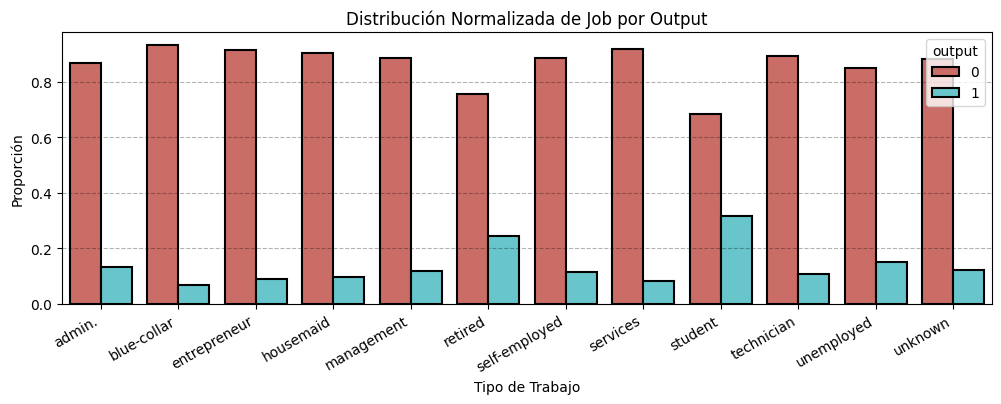

In [193]:
# Calcular la proporción de cada 'output' dentro de cada 'job'
normalized_df = df.groupby('job')['output'].value_counts(normalize=True).unstack().fillna(0)

# Reestructurar el DataFrame en formato largo para usar con Seaborn
normalized_long_df = normalized_df.reset_index().melt(id_vars='job', value_vars=normalized_df.columns, var_name='output', value_name='proportion')

# Crear el gráfico de barras normalizado
plt.figure(figsize=(12, 4))
sns.barplot(
    x='job',
    y='proportion',
    hue='output',
    data=normalized_long_df,
    palette='hls',
    edgecolor='black',
    linewidth=1.5,
    order=normalized_df.index
)

# Mostrar el gráfico
plt.title('Distribución Normalizada de Job por Output')
plt.xlabel('Tipo de Trabajo')
plt.ylabel('Proporción')
plt.grid(axis="y", linestyle='--', color="black", alpha=0.3)
plt.gcf().autofmt_xdate()
plt.show()


#### Categorizado por probabilidad + Mean Encoding **JOB**

In [194]:
def loan_request_probability(job):
    if job in ["blue-collar", "housemaid", "self-employed", "entrepreneur", "services"]:
        return 3
    elif job in ["admin.", "technician", "student"]:
        return 2
    elif job in ["management", "retired", "unemployed","unknown"]:
        return 1
    else:
        return "Sin Clasificar"
# Primero aplicamos la función para crear las categorías
df["job_encoded"] = df["job"].apply(loan_request_probability)

# Ahora calculamos la tasa de conversión agrupando por job_encoded
job_conversion = df.groupby("job_encoded")["output"].mean()

# Luego mapeamos las categorías job_encoded a su respectiva tasa de conversión
df["job_encoded"] = df["job_encoded"].map(job_conversion)

# Finalmente verificamos la distribución
df["job_encoded"].value_counts()


job_encoded
0.1316    14531
0.0785    13746
0.1596     4831
Name: count, dtype: int64

 #### Distribución de categorías de **Job** transformadas por mean encoding

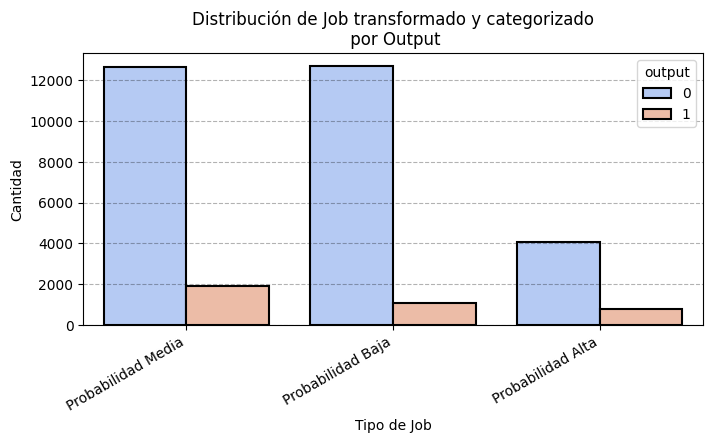

In [195]:
plt.figure(figsize=(8, 4))
# Crear el gráfico de conteo
sns.countplot(
    x='job_encoded', 
    data=df, 
    hue='output', 
    linewidth=1.5, 
    edgecolor='black', 
    palette="coolwarm",
    order=df['job_encoded'].value_counts().index
)

# Renombrar las etiquetas del eje X manualmente
new_labels = [
    "Probabilidad Media",
    "Probabilidad Baja",
    "Probabilidad Alta"
]

# Asignar las nuevas etiquetas a las posiciones del eje X
plt.xticks(ticks=range(len(new_labels)), labels=new_labels)

# Mostrar el gráfico
plt.title('Distribución de Job transformado y categorizado\n por Output')
plt.xlabel('Tipo de Job')
plt.ylabel('Cantidad')
plt.grid(axis="y", linestyle='--', color="black", alpha=0.3)
plt.gcf().autofmt_xdate()
plt.show()

#### Distribución del ouput por **Education_level** 

In [196]:
df["education_level"].value_counts()

education_level
university.degree      9800
high.school            7630
basic.9y               4817
professional.course    4258
basic.4y               3332
basic.6y               1873
unknown                1384
illiterate               14
Name: count, dtype: int64

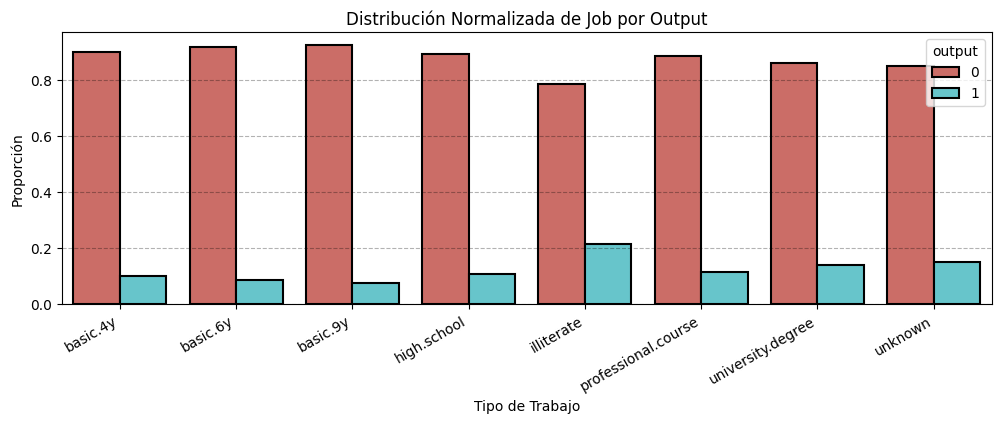

In [197]:
# Calcular la proporción de cada 'output' dentro de cada 'job'
normalized_df = df.groupby('education_level')['output'].value_counts(normalize=True).unstack().fillna(0)

# Reestructurar el DataFrame en formato largo para usar con Seaborn
normalized_long_df = normalized_df.reset_index().melt(id_vars='education_level', value_vars=normalized_df.columns, var_name='output', value_name='proportion')

# Crear el gráfico de barras normalizado
plt.figure(figsize=(12, 4))
sns.barplot(
    x='education_level',
    y='proportion',
    hue='output',
    data=normalized_long_df,
    palette='hls',
    edgecolor='black',
    linewidth=1.5,
    order=normalized_df.index
)

# Mostrar el gráfico
plt.title('Distribución Normalizada de Job por Output')
plt.xlabel('Tipo de Trabajo')
plt.ylabel('Proporción')
plt.grid(axis="y", linestyle='--', color="black", alpha=0.3)
plt.gcf().autofmt_xdate()
plt.show()

#### Categorizado por `Nivel de estudios` + Mean enconding de **Education_level**

In [198]:
def categorize_education_level(df):
    def categorize(level):
        if level in ["illiterate", "basic.4y", "basic.6y", "basic.9y", "unknown"]:
            return 1  # Básico
        elif level in ["high.school", "professional.course"]:
            return 2  # Intermedio
        elif level == "university.degree":
            return 3  # Avanzado
    
    df["education_category"] = df["education_level"].apply(categorize)
    return df

df["education_level_encoded"] = categorize_education_level(df)["education_category"]
group_education = df.groupby("education_level_encoded")["output"].mean()
df["education_level_encoded"] = df["education_level_encoded"].map(group_education)

df["education_level_encoded"].value_counts(normalize=True) * 100

education_level_encoded
0.1105   35.9067
0.0945   34.4932
0.1397   29.6001
Name: proportion, dtype: float64

 #### Distribución de categorías de **`Education_level`** transformadas por mean encoding

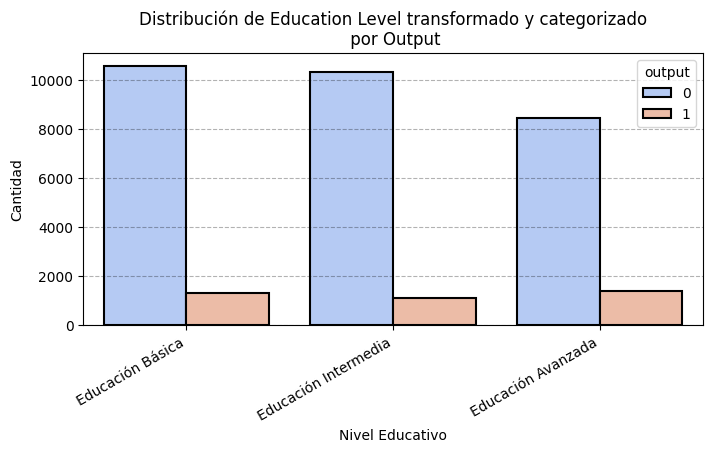

In [199]:
plt.figure(figsize=(8, 4))

# Crear el gráfico de conteo para education_level_encoded
sns.countplot(
    x='education_level_encoded', 
    data=df, 
    hue='output', 
    linewidth=1.5, 
    edgecolor='black', 
    palette="coolwarm",
    order=df['education_level_encoded'].value_counts().index
)

# Renombrar las etiquetas del eje X manualmente
new_labels = [
    "Educación Básica", 
    "Educación Intermedia", 
    "Educación Avanzada"
]

# Asignar las nuevas etiquetas a las posiciones del eje X
plt.xticks(ticks=range(len(new_labels)), labels=new_labels)

# Configurar título y etiquetas de los ejes
plt.title('Distribución de Education Level transformado y categorizado\n por Output')
plt.xlabel('Nivel Educativo')
plt.ylabel('Cantidad')
plt.grid(axis="y", linestyle='--', color="black", alpha=0.3)
plt.gcf().autofmt_xdate()

# Mostrar el gráfico
plt.show()


#### Distribución del output por `Estado Civil`

In [200]:
df["marital_status"].value_counts()

marital_status
married     20066
single       9257
divorced     3719
unknown        66
Name: count, dtype: int64

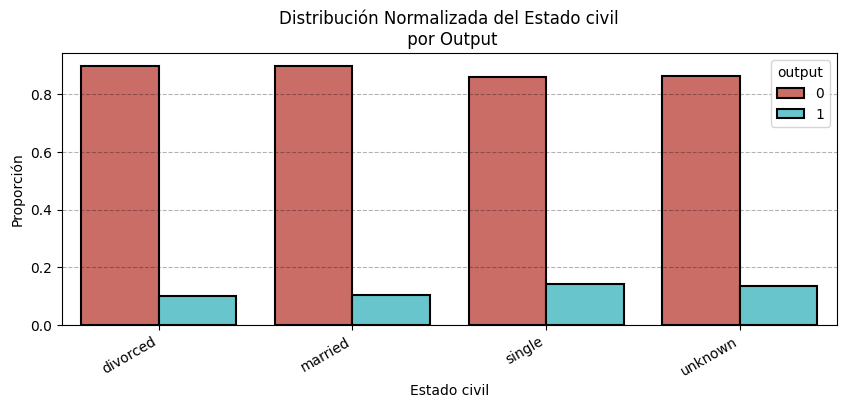

In [201]:
# Calcular la proporción de cada 'output' dentro de cada estado civil
normalized_df = df.groupby('marital_status')['output'].value_counts(normalize=True).unstack().fillna(0)

# Reestructurar el DataFrame en formato largo para usar con Seaborn
normalized_long_df = normalized_df.reset_index().melt(id_vars='marital_status', value_vars=normalized_df.columns, var_name='output', value_name='proportion')

# Crear el gráfico de barras normalizado
plt.figure(figsize=(10, 4))
sns.barplot(
    x='marital_status',
    y='proportion',
    hue='output',
    data=normalized_long_df,
    palette='hls',
    edgecolor='black',
    linewidth=1.5,
    order=normalized_df.index
)

# Mostrar el gráfico
plt.title('Distribución Normalizada del Estado civil\n por Output')
plt.xlabel('Estado civil')
plt.ylabel('Proporción')
plt.grid(axis="y", linestyle='--', color="black", alpha=0.3)
plt.gcf().autofmt_xdate()
plt.show()

### Categorizado del **Estado civil** en `Solteros` o `En pareja` + One hot Encoding

In [202]:
def categorize_marital_status(row):
    if row["marital_status"] in ["single", "divorced"]:
        return 0
    elif row["marital_status"] in ["married", "unknown"]:
        return 1

df["marital_status_encoded"] = df.apply(categorize_marital_status, axis=1)
df["marital_status_encoded"].value_counts() 

marital_status_encoded
1    20132
0    12976
Name: count, dtype: int64

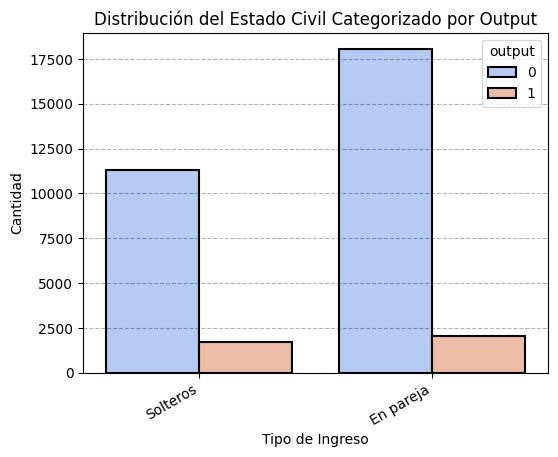

In [203]:
plt.figure(figsize=(6, 5))

# Crear el gráfico de conteo para marital_status_encoded
sns.countplot(
    x='marital_status_encoded', 
    data=df, 
    hue='output', 
    linewidth=1.5, 
    edgecolor='black', 
    palette="coolwarm"
)

# Renombrar las etiquetas del eje X manualmente
plt.xticks(ticks=[0, 1], labels=["Solteros", "En pareja"])

# Configurar título y etiquetas de los ejes
plt.title('Distribución del Estado Civil Categorizado por Output')
plt.xlabel('Tipo de Ingreso')
plt.ylabel('Cantidad')
plt.grid(axis="y", linestyle='--', color="black", alpha=0.3)
plt.gcf().autofmt_xdate()

# Mostrar el gráfico
plt.show()

### Distribución del output por **`Mes`**

In [204]:
df["month"].value_counts()

month
may    11061
jul     5750
aug     4982
jun     4311
nov     3291
apr     2081
oct      580
sep      465
mar      441
dec      146
Name: count, dtype: int64

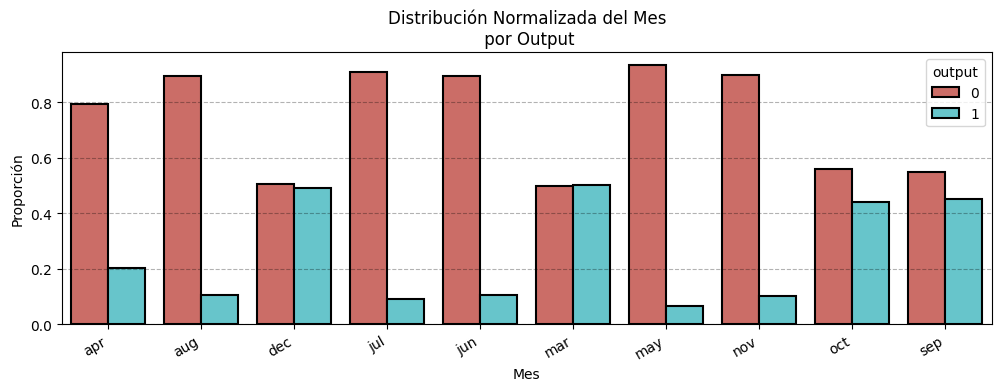

In [205]:
# Calcular la proporción de cada 'output' dentro de cada mes
normalized_df = df.groupby('month')['output'].value_counts(normalize=True).unstack().fillna(0)

# Reestructurar el DataFrame en formato largo para usar con Seaborn
normalized_long_df = normalized_df.reset_index().melt(id_vars='month', value_vars=normalized_df.columns, var_name='output', value_name='proportion')

# Crear el gráfico de barras normalizado
plt.figure(figsize=(12, 4))
sns.barplot(
    x='month',
    y='proportion',
    hue='output',
    data=normalized_long_df,
    palette='hls',
    edgecolor='black',
    linewidth=1.5,
    order=normalized_df.index
)

# Mostrar el gráfico
plt.title('Distribución Normalizada del Mes\n por Output')
plt.xlabel('Mes')
plt.ylabel('Proporción')
plt.grid(axis="y", linestyle='--', color="black", alpha=0.3)
plt.gcf().autofmt_xdate()
plt.show()

#### Categorizado `Trimestral` + Label Encoding de **`Month`**
Se deja por defecto el 1er trimestre por faltar datos de enero y febrero

In [206]:
# Convertir 'month' a trimestres
def trimestre(month):
    if month in ['apr', 'may', 'jun']:
        return 2
    elif month in ['jul', 'aug', 'sep']:
        return 3
    elif month in ['oct', 'nov', 'dec']:  
        return 4
    else:
        return 1 # 1er Trimestre (por defecto, faltan enero y febrero)

df['month_encoded'] = df['month'].apply(trimestre)
df['month_encoded'].value_counts()

month_encoded
2    17453
3    11197
4     4017
1      441
Name: count, dtype: int64

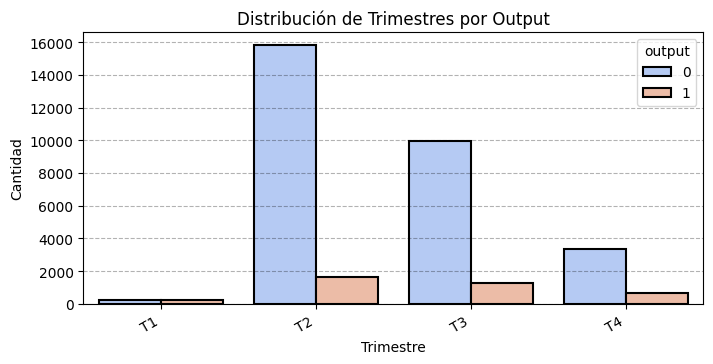

In [207]:
plt.figure(figsize=(8, 4))

# Crear el gráfico de conteo para month_encoded
sns.countplot(
    x='month_encoded', 
    data=df, 
    hue='output', 
    linewidth=1.5, 
    edgecolor='black', 
    palette="coolwarm"
)

# Renombrar las etiquetas del eje X manualmente
plt.xticks(ticks=[0, 1, 2, 3], labels=["T1", "T2", "T3", "T4"])

# Configurar título y etiquetas de los ejes
plt.title('Distribución de Trimestres por Output')
plt.xlabel('Trimestre')
plt.ylabel('Cantidad')
plt.grid(axis="y", linestyle='--', color="black", alpha=0.3)
plt.gcf().autofmt_xdate()

# Mostrar el gráfico
plt.show()

### Distribución del output por **Día de la semana**: **`Day`**

In [208]:
df["day_of_week"].value_counts()

day_of_week
thu    6906
mon    6862
wed    6541
tue    6497
fri    6302
Name: count, dtype: int64

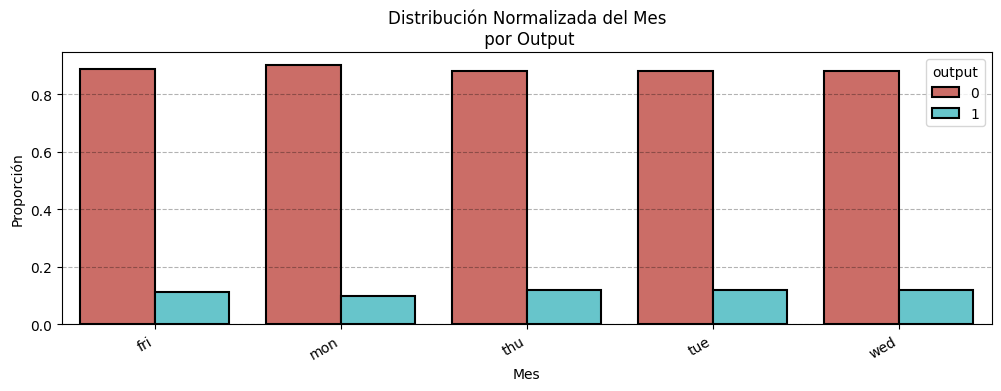

In [209]:
# Calcular la proporción de cada 'output' dentro de cada día de la semana
normalized_df = df.groupby('day_of_week')['output'].value_counts(normalize=True).unstack().fillna(0)

# Reestructurar el DataFrame en formato largo para usar con Seaborn
normalized_long_df = normalized_df.reset_index().melt(id_vars='day_of_week', value_vars=normalized_df.columns, var_name='output', value_name='proportion')

# Crear el gráfico de barras normalizado
plt.figure(figsize=(12, 4))
sns.barplot(
    x='day_of_week',
    y='proportion',
    hue='output',
    data=normalized_long_df,
    palette='hls',
    edgecolor='black',
    linewidth=1.5,
    order=normalized_df.index
)

# Mostrar el gráfico
plt.title('Distribución Normalizada del Mes\n por Output')
plt.xlabel('Mes')
plt.ylabel('Proporción')
plt.grid(axis="y", linestyle='--', color="black", alpha=0.3)
plt.gcf().autofmt_xdate()
plt.show()

### Label Encoding de **`Day`**

In [210]:
def day_of_week(day):
    if day == 'mon':
        return 5
    elif day == 'tue':
        return 0
    elif day == 'wed':
        return 1
    elif day == 'thu':
        return 2
    elif day == 'fri':
        return 4
df['day_of_week_encoded'] = df['day_of_week'].apply(day_of_week)
df['day_of_week_encoded'].value_counts()

day_of_week_encoded
2    6906
5    6862
1    6541
0    6497
4    6302
Name: count, dtype: int64

### Distribución de las edades: `Age`

In [211]:
df["age"].describe()

count   33108.0000
mean       40.0389
std        10.4039
min        17.0000
25%        32.0000
50%        38.0000
75%        47.0000
max        98.0000
Name: age, dtype: float64

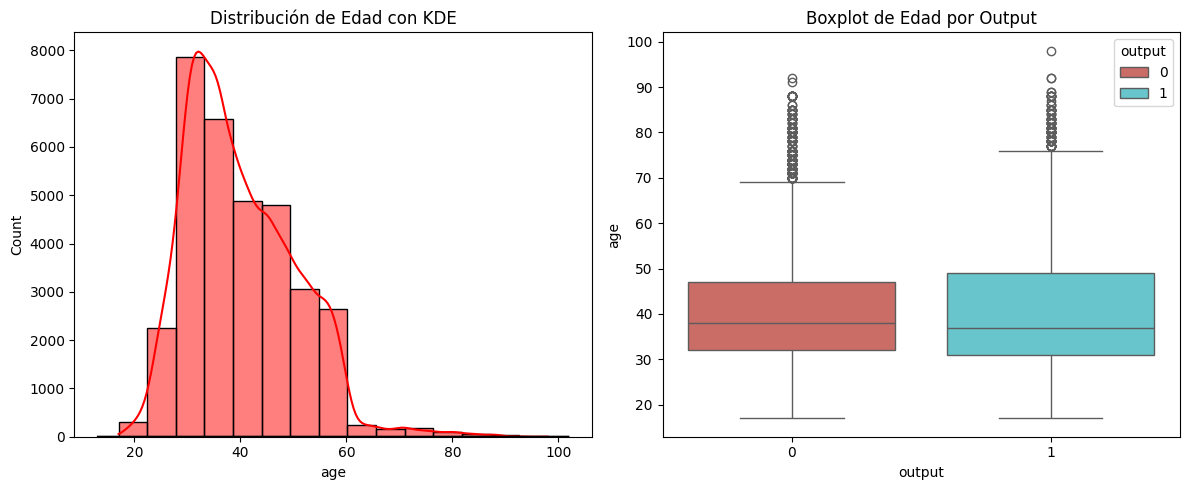

In [212]:
# Crear la figura y los ejes
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Histograma con KDE en ax1
sns.histplot(data=df, x='age', bins=15, kde=True, color='red', ax=ax1)
sns.kdeplot(data=df, x='age', color='black', ax=ax1)
ax1.set_title('Distribución de Edad con KDE')

# Boxplot en ax2
sns.boxplot(data=df, y='age', x='output', hue='output',palette="hls", ax=ax2)
ax2.set_title('Boxplot de Edad por Output')

# Mostrar los gráficos
plt.tight_layout()
plt.show()


#### Categorizado por grupos de edades desde `Jóvenes adultos` hasta `Tercera Edad` + Label encoding

In [213]:
def edad(row):
    if row["age"] <= 30:
        return 1
    elif row["age"] > 30 and row["age"] <= 40:
        return 2
    elif row["age"] > 40 and row["age"] <= 50:
        return 3
    elif row["age"] > 50 and row["age"] <= 62:
        return 4
    elif row["age"] > 62:
        return 5

df["age_encoded"] = df.apply(edad, axis=1) 
df["age_encoded"].value_counts()

age_encoded
2    13203
3     8286
1     5873
4     5120
5      626
Name: count, dtype: int64

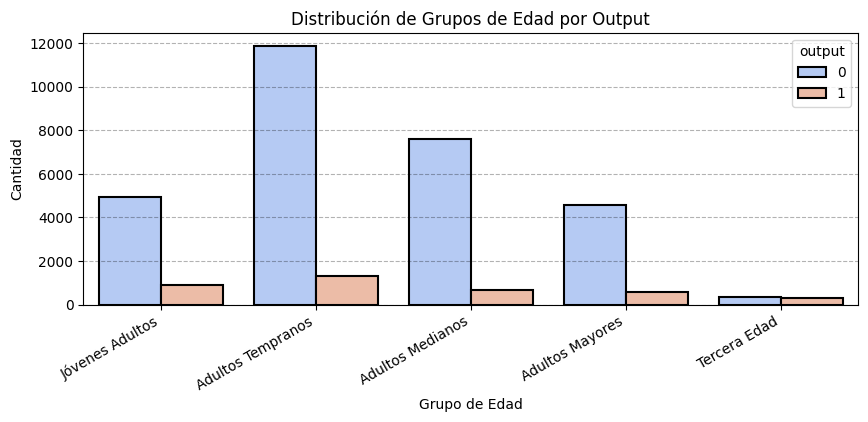

In [214]:
# Crear una figura con tamaño específico
plt.figure(figsize=(10, 4))

# Crear el gráfico de conteo para age_encoded
sns.countplot(
    x='age_encoded', 
    data=df, 
    hue='output', 
    linewidth=1.5, 
    edgecolor='black', 
    palette="coolwarm"
)

# Renombrar las etiquetas del eje X manualmente
plt.xticks(ticks=[0, 1, 2, 3, 4], labels=["Jóvenes Adultos", "Adultos Tempranos", "Adultos Medianos", "Adultos Mayores", "Tercera Edad"])

# Configurar título y etiquetas de los ejes
plt.title('Distribución de Grupos de Edad por Output')
plt.xlabel('Grupo de Edad')
plt.ylabel('Cantidad')
plt.grid(axis="y", linestyle='--', color="black", alpha=0.3)
plt.gcf().autofmt_xdate()

# Mostrar el gráfico
plt.show()


### Distribución del output por si tiene o no deudas, `is_default`.

In [215]:
df["is_default"].value_counts() 

is_default
no         26209
unknown     6897
yes            2
Name: count, dtype: int64

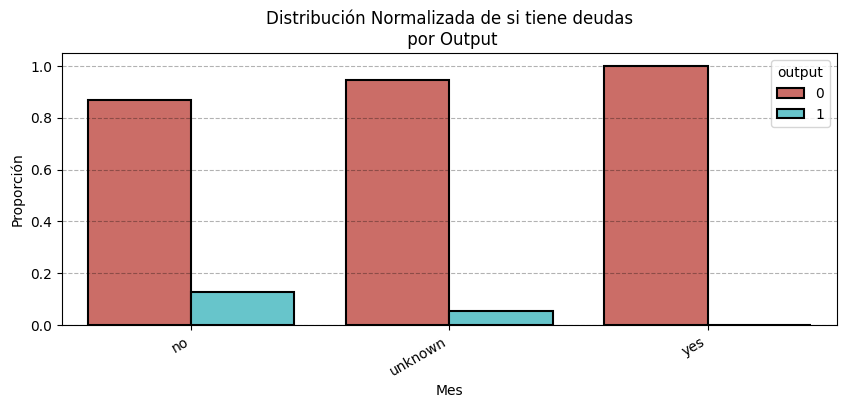

In [216]:
# Calcular la proporción de cada 'output' dentro de cada estado civil
normalized_df = df.groupby('is_default')['output'].value_counts(normalize=True).unstack().fillna(0)

# Reestructurar el DataFrame en formato largo para usar con Seaborn
normalized_long_df = normalized_df.reset_index().melt(id_vars='is_default', value_vars=normalized_df.columns, var_name='output', value_name='proportion')

# Crear el gráfico de barras normalizado
plt.figure(figsize=(10, 4))
sns.barplot(
    x='is_default',
    y='proportion',
    hue='output',
    data=normalized_long_df,
    palette='hls',
    edgecolor='black',
    linewidth=1.5,
    order=normalized_df.index
)

# Mostrar el gráfico
plt.title('Distribución Normalizada de si tiene deudas\n por Output')
plt.xlabel('Mes')
plt.ylabel('Proporción')
plt.grid(axis="y", linestyle='--', color="black", alpha=0.3)
plt.gcf().autofmt_xdate()
plt.show()

### Categorizado por si el cliente esta `Soltero` o `En pareja` y `si/no tiene deudas` + Mean Encoding

In [217]:
# Borrar la variable 'yes' en 'is_default'
df['is_default'] = df['is_default'].apply(lambda x: 0 if x == 'no' else 1)


def status_marital_default(row):
    if row["marital_status_encoded"] == 0 and row["is_default"] == 1:
        return 1  # Solteros/Divorciados con deudas
    elif row["marital_status_encoded"] == 0 and row["is_default"] == 0:
        return 2  # Solteros/Divorciados sin deudas
    elif row["marital_status_encoded"] == 1 and row["is_default"] == 1:
        return 3  # Casados/Unknown con deudas
    elif row["marital_status_encoded"] == 1 and row["is_default"] == 0:
        return 4  # Casados/Unknown sin deudas
    else:
        return -1  # Por si hay algún valor inesperado

# Aplicar la función
df["status_marital_default"] = df.apply(status_marital_default, axis=1)
group_status_marital_default = df.groupby("status_marital_default")["output"].mean()
df["status_marital_default"] = df["status_marital_default"].map(group_status_marital_default)

# Ver los resultados
print(df["status_marital_default"].value_counts())

status_marital_default
0.1199    15094
0.1426    11115
0.0514     5038
0.0580     1861
Name: count, dtype: int64


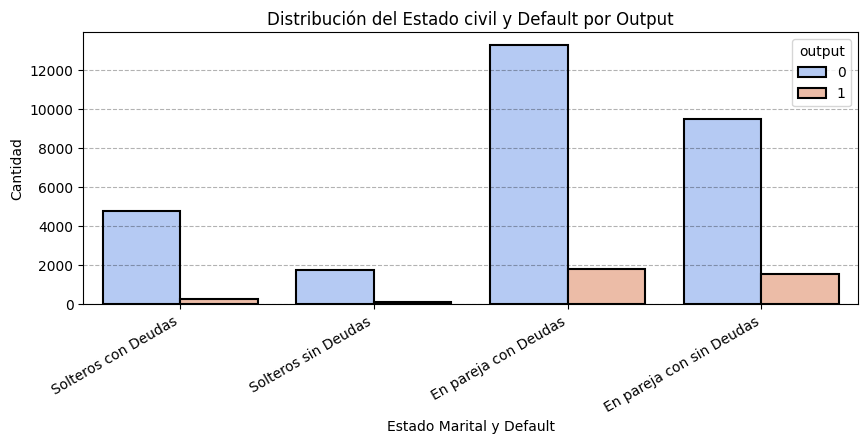

In [218]:
# Crear una figura con tamaño específico
plt.figure(figsize=(10, 4))

# Crear el gráfico de conteo para status_marital_default
sns.countplot(
    x='status_marital_default', 
    data=df, 
    hue='output', 
    linewidth=1.5, 
    edgecolor='black', 
    palette="coolwarm"
)

# Renombrar las etiquetas del eje X manualmente
plt.xticks(
    ticks=[0, 1, 2, 3], 
    labels=[
        "Solteros con Deudas", 
        "Solteros sin Deudas", 
        "En pareja con Deudas", 
        "En pareja con sin Deudas"
    ]
)

# Configurar título y etiquetas de los ejes
plt.title('Distribución del Estado civil y Default por Output')
plt.xlabel('Estado Marital y Default')
plt.ylabel('Cantidad')
plt.grid(axis="y", linestyle='--', color="black", alpha=0.3)
plt.gcf().autofmt_xdate()

# Mostrar el gráfico
plt.show()


### Distribución del output por si tiene o no un prestamo hipotecario, `housing_type`.

In [219]:
df["housing_type"].value_counts()

housing_type
yes        17364
no         14936
unknown      808
Name: count, dtype: int64

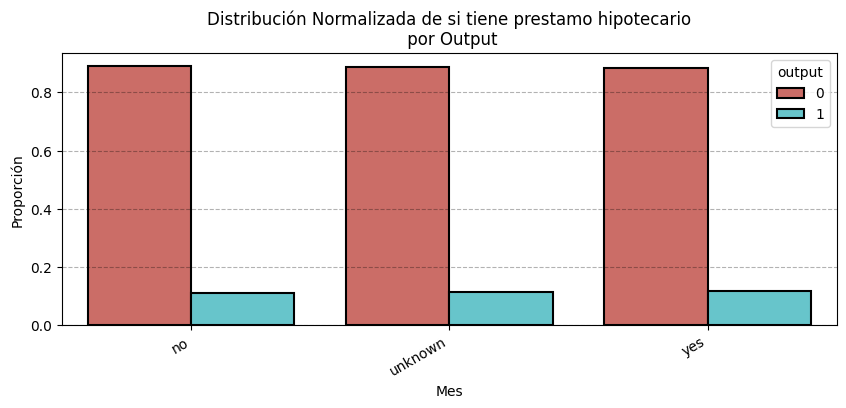

In [220]:
# Calcular la proporción de cada 'output' 
normalized_df = df.groupby('housing_type')['output'].value_counts(normalize=True).unstack().fillna(0)

# Reestructurar el DataFrame en formato largo para usar con Seaborn
normalized_long_df = normalized_df.reset_index().melt(id_vars='housing_type', value_vars=normalized_df.columns, var_name='output', value_name='proportion')

# Crear el gráfico de barras normalizado
plt.figure(figsize=(10, 4))
sns.barplot(
    x='housing_type',
    y='proportion',
    hue='output',
    data=normalized_long_df,
    palette='hls',
    edgecolor='black',
    linewidth=1.5,
    order=normalized_df.index
)

# Mostrar el gráfico
plt.title('Distribución Normalizada de si tiene prestamo hipotecario\n por Output')
plt.xlabel('Mes')
plt.ylabel('Proporción')
plt.grid(axis="y", linestyle='--', color="black", alpha=0.3)
plt.gcf().autofmt_xdate()
plt.show()

### Categorizado por si el cliente esta `Soltero` o `En pareja` y si/no tiene `prestamo hipotecario` + Mean Encoding

In [221]:
def status_marital_housing(row):
    if row["marital_status_encoded"] == 0 and row["housing_type"] in ["yes", "unknown"]:
        return 1  # Solteros/Divorciados con hipoteca (incluye unknown)
    elif row["marital_status_encoded"] == 0 and row["housing_type"] == "no":
        return 2  # Solteros/Divorciados sin hipoteca
    elif row["marital_status_encoded"] == 1 and row["housing_type"] in ["yes", "unknown"]:
        return 3  # Casados/Unknown con hipoteca (incluye unknown)
    elif row["marital_status_encoded"] == 1 and row["housing_type"] == "no":
        return 4  # Casados/Unknown sin hipoteca
    else:
        return -1  # Por si hay algún valor inesperado

# Aplicar la función al DataFrame
df["status_marital_housing"] = df.apply(status_marital_housing, axis=1)

grupo_housing = df.groupby("status_marital_housing")["output"].mean()
df["status_marital_housing"] = df["status_marital_housing"].map(grupo_housing)
df["status_marital_housing"].value_counts()

status_marital_housing
0.1059    10978
0.0990     9154
0.1339     7194
0.1263     5782
Name: count, dtype: int64

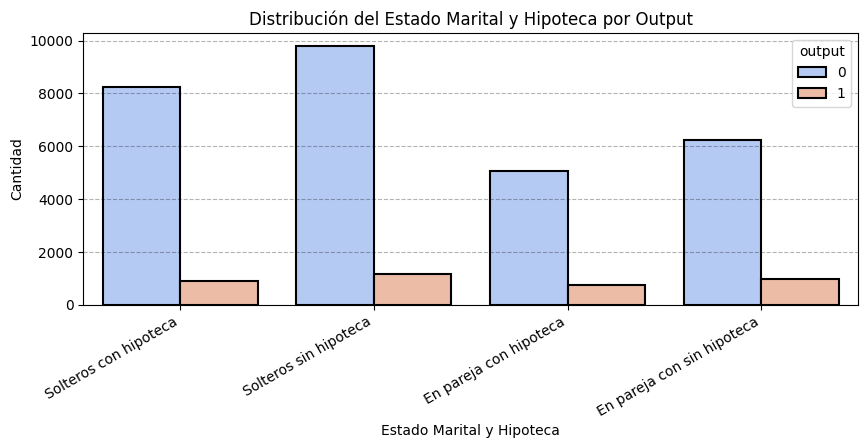

In [222]:
# Crear una figura con tamaño específico
plt.figure(figsize=(10, 4))

# Crear el gráfico de conteo para status_marital_housing
sns.countplot(
    x='status_marital_housing', 
    data=df, 
    hue='output', 
    linewidth=1.5, 
    edgecolor='black', 
    palette="coolwarm"
)

# Renombrar las etiquetas del eje X manualmente
plt.xticks(
    ticks=[0, 1, 2, 3], 
    labels=[
        "Solteros con hipoteca", 
        "Solteros sin hipoteca", 
        "En pareja con hipoteca", 
        "En pareja con sin hipoteca"
    ]
)

# Configurar título y etiquetas de los ejes
plt.title('Distribución del Estado Marital y Hipoteca por Output')
plt.xlabel('Estado Marital y Hipoteca')
plt.ylabel('Cantidad')
plt.grid(axis="y", linestyle='--', color="black", alpha=0.3)
plt.gcf().autofmt_xdate()

# Mostrar el gráfico
plt.show()


### Distribución del output por si tiene o no un prestamo personal, `loan`.

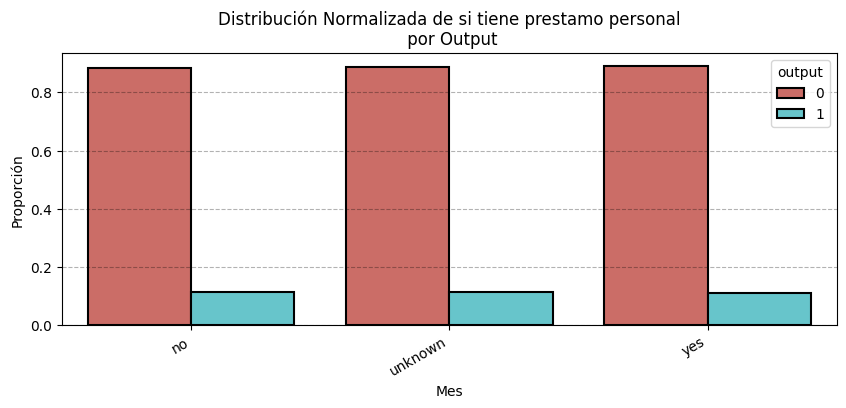

In [223]:
# Calcular la proporción de cada 'output' 
normalized_df = df.groupby('loan')['output'].value_counts(normalize=True).unstack().fillna(0)

# Reestructurar el DataFrame en formato largo para usar con Seaborn
normalized_long_df = normalized_df.reset_index().melt(id_vars='loan', value_vars=normalized_df.columns, var_name='output', value_name='proportion')

# Crear el gráfico de barras normalizado
plt.figure(figsize=(10, 4))
sns.barplot(
    x='loan',
    y='proportion',
    hue='output',
    data=normalized_long_df,
    palette='hls',
    edgecolor='black',
    linewidth=1.5,
    order=normalized_df.index
)

# Mostrar el gráfico
plt.title('Distribución Normalizada de si tiene prestamo personal\n por Output')
plt.xlabel('Mes')
plt.ylabel('Proporción')
plt.grid(axis="y", linestyle='--', color="black", alpha=0.3)
plt.gcf().autofmt_xdate()
plt.show()

### Categorizado por si el cliente esta `Soltero` o `En pareja` y si/no tiene `prestamo personal` + Mean Encoding

In [224]:
def status_marital_loan(row):
    if row["marital_status_encoded"] == 0 and row["loan"] == "yes":
        return 1  # Solteros/Divorciados con préstamo personal
    elif row["marital_status_encoded"] == 0 and row["loan"] in ["no", "unknown"]:
        return 2  # Solteros/Divorciados sin préstamo personal (incluye unknown)
    elif row["marital_status_encoded"] == 1 and row["loan"] == "yes":
        return 3  # Casados/Unknown con préstamo personal
    elif row["marital_status_encoded"] == 1 and row["loan"] in ["no", "unknown"]:
        return 4  # Casados/Unknown sin préstamo personal (incluye unknown)
    else:
        return -1  # Por si hay algún valor inesperado

# Aplicar la función al DataFrame
df["status_marital_loan"] = df.apply(status_marital_loan, axis=1)
groupo_loan = df.groupby("status_marital_loan")["output"].mean()
df["status_marital_loan"] = df["status_marital_loan"].map(groupo_loan)
# Ver los resultados
print(df["status_marital_loan"].value_counts())

status_marital_loan
0.1031    17075
0.1319    11015
0.1011     3057
0.1224     1961
Name: count, dtype: int64


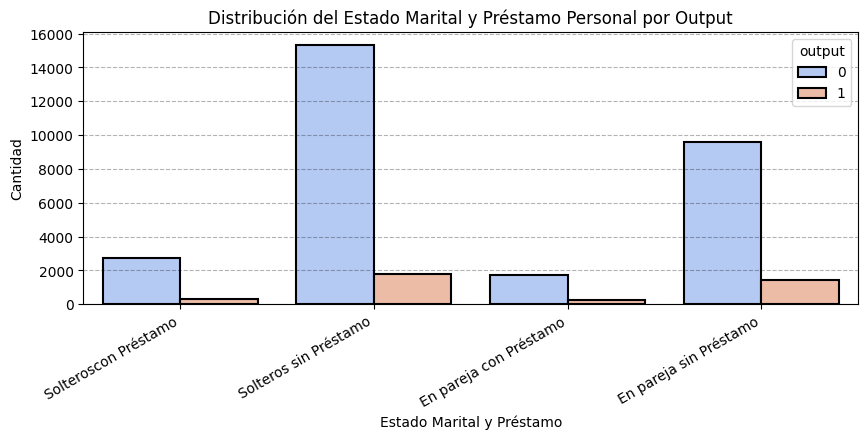

In [225]:
# Crear una figura con tamaño específico
plt.figure(figsize=(10, 4))

# Crear el gráfico de conteo para status_marital_loan
sns.countplot(
    x='status_marital_loan', 
    data=df, 
    hue='output', 
    linewidth=1.5, 
    edgecolor='black', 
    palette="coolwarm"
)

# Renombrar las etiquetas del eje X manualmente
plt.xticks(
    ticks=[0, 1, 2, 3], 
    labels=[
        "Solteroscon Préstamo", 
        "Solteros sin Préstamo", 
        "En pareja con Préstamo", 
        "En pareja sin Préstamo"
    ]
)

# Configurar título y etiquetas de los ejes
plt.title('Distribución del Estado Marital y Préstamo Personal por Output')
plt.xlabel('Estado Marital y Préstamo')
plt.ylabel('Cantidad')
plt.grid(axis="y", linestyle='--', color="black", alpha=0.3)
plt.gcf().autofmt_xdate()

# Mostrar el gráfico
plt.show()

### Distribución del output por los Resultados de la campaña anterior `poutcome`

In [226]:
df["poutcome"].value_counts()

poutcome
nonexistent    28586
failure         3388
success         1134
Name: count, dtype: int64

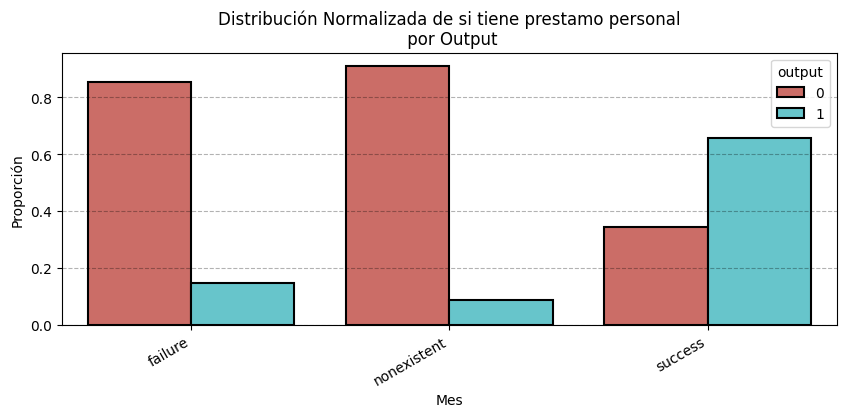

In [227]:
# Calcular la proporción de cada 'output' 
normalized_df = df.groupby('poutcome')['output'].value_counts(normalize=True).unstack().fillna(0)

# Reestructurar el DataFrame en formato largo para usar con Seaborn
normalized_long_df = normalized_df.reset_index().melt(id_vars='poutcome', value_vars=normalized_df.columns, var_name='output', value_name='proportion')

# Crear el gráfico de barras normalizado
plt.figure(figsize=(10, 4))
sns.barplot(
    x='poutcome',
    y='proportion',
    hue='output',
    data=normalized_long_df,
    palette='hls',
    edgecolor='black',
    linewidth=1.5,
    order=normalized_df.index
)

# Mostrar el gráfico
plt.title('Distribución Normalizada de si tiene prestamo personal\n por Output')
plt.xlabel('Mes')
plt.ylabel('Proporción')
plt.grid(axis="y", linestyle='--', color="black", alpha=0.3)
plt.gcf().autofmt_xdate()
plt.show()

### Mean encoding del resultado de la campaña anterior `poutcome`

In [228]:
poutcome_group = df.groupby("poutcome")["output"].mean().sort_values(ascending=False)
# Mapear las medias de 'poutcome' al DataFrame original
df["poutcome_encoded"] = df["poutcome"].map(poutcome_group)
df["poutcome_encoded"].value_counts()

poutcome_encoded
0.0884    28586
0.1452     3388
0.6561     1134
Name: count, dtype: int64

---

## 📢 Contexto Campaña de Marketing 

---

#### Distribución del output por número de contactos realizados antes de esta campaña con este cliente:   `previous`

In [229]:
df["previous"].value_counts()

previous
0    28586
1     3662
2      617
3      169
4       56
5       13
6        4
7        1
Name: count, dtype: int64

### Categorizado por intervalos: `Sin Contacto`, `1 Contacto`, `2-4 Contactos`, `Más de 4 Contactos` antes de esta campaña + Label Encoding

In [230]:
# Paso 1: Crear la etiqueta 'previous_label' basada en 'previous'
def n_contactos(row):
    if row['previous'] == 0:
        return 0
    elif row['previous'] == 1:
        return 1
    elif row['previous'] > 2 and row['previous'] <= 4:
        return 2
    else:
        return 3

df["previous_label"] = df.apply(n_contactos, axis=1)
df["previous_label"].value_counts()

previous_label
0    28586
1     3662
3      635
2      225
Name: count, dtype: int64

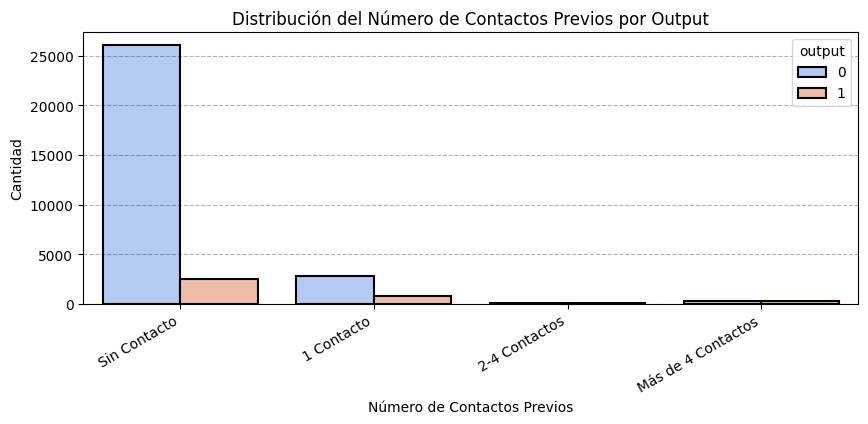

In [231]:
# Crear una figura con tamaño específico
plt.figure(figsize=(10, 4))

# Crear el gráfico de conteo para previous_label
sns.countplot(
    x='previous_label', 
    data=df, 
    hue='output', 
    linewidth=1.5, 
    edgecolor='black', 
    palette="coolwarm"
)

# Renombrar las etiquetas del eje X manualmente
plt.xticks(
    ticks=[0, 1, 2, 3], 
    labels=[
        "Sin Contacto", 
        "1 Contacto", 
        "2-4 Contactos", 
        "Más de 4 Contactos"
    ]
)

# Configurar título y etiquetas de los ejes
plt.title('Distribución del Número de Contactos Previos por Output')
plt.xlabel('Número de Contactos Previos')
plt.ylabel('Cantidad')
plt.grid(axis="y", linestyle='--', color="black", alpha=0.3)
plt.gcf().autofmt_xdate()

# Mostrar el gráfico
plt.show()


### Distribución del numeroías desde que el cliente fue contactado en una campaña anterior: `pdays`



In [232]:
# Reemplazar 'pdays' con 0 por 999 
df["pdays"] = df["pdays"].replace(999, 0)

In [233]:
df["pdays"].describe()

count   33108.0000
mean        0.2260
std         1.3677
min         0.0000
25%         0.0000
50%         0.0000
75%         0.0000
max        27.0000
Name: pdays, dtype: float64

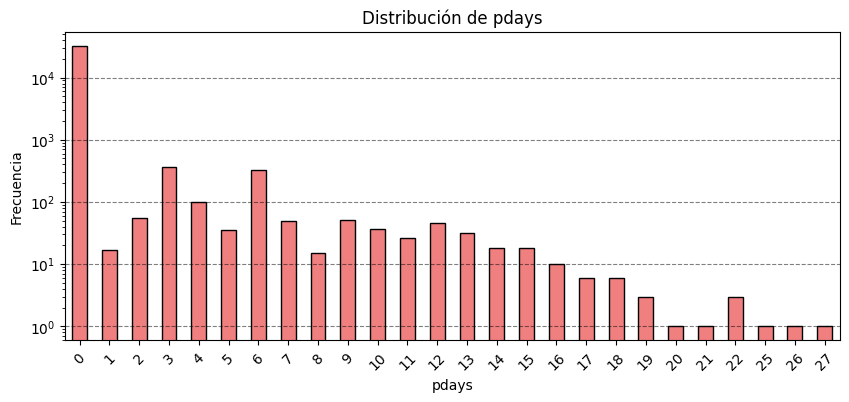

In [234]:
# Contar las frecuencias únicas
pdays_counts = df['pdays'].value_counts().sort_index()

# Crear la figura
plt.figure(figsize=(10, 4))

# Gráfica de barras
pdays_counts.plot(kind='bar', color='lightcoral', edgecolor='black')

# Configurar título y etiquetas
plt.title('Distribución de pdays')
plt.xlabel('pdays')
plt.ylabel('Frecuencia')
plt.yscale('log')  #  escala logarítmica para visualizar mejor
plt.grid(axis='y', linestyle='--',color="black", alpha=0.5)

# Mostrar el gráfico
plt.xticks(rotation=45)
plt.show()

####  Encoding por intervalo: `Sin Contacto (0 días)`, `1-5 Días desde Último Contacto`,` Más de 5 Días` + Mean encoding

In [235]:
# Paso 1: Convertir 'pdays' a categórica
def trasform_pdays(row):
    if row["pdays"] == 0:
        return 0
    elif row["pdays"] >= 1 and row["pdays"] <= 5:
        return 1
    else:
        return 2

df['pdays_encoded'] = df.apply(trasform_pdays, axis=1)
group_pdays = df.groupby("pdays_encoded")["output"].mean()
df["pdays_encoded"] = df["pdays_encoded"].map(group_pdays)

df['pdays_encoded'].value_counts()

pdays_encoded
0.0933    31876
0.6505      658
0.6289      574
Name: count, dtype: int64

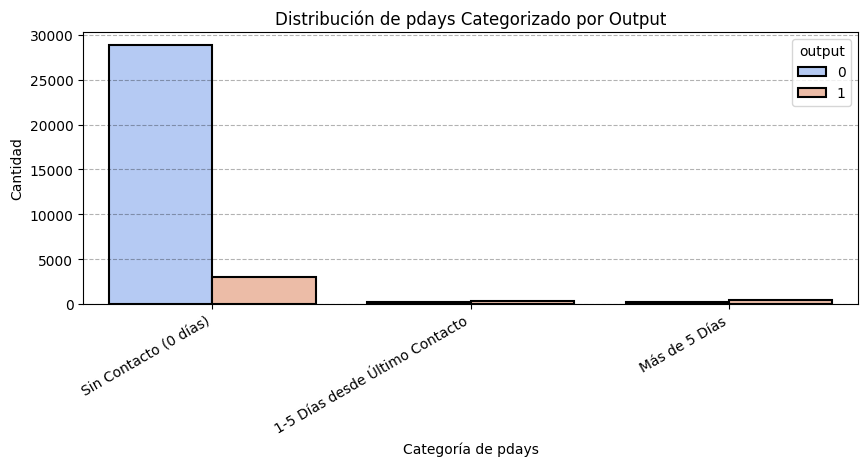

In [236]:
# Crear una figura con tamaño específico
plt.figure(figsize=(10, 4))

# Crear el gráfico de conteo para pdays_encoded
sns.countplot(
    x='pdays_encoded', 
    data=df, 
    hue='output', 
    linewidth=1.5, 
    edgecolor='black', 
    palette="coolwarm"
)

# Renombrar las etiquetas del eje X manualmente
plt.xticks(
    ticks=[0, 1, 2], 
    labels=[
        "Sin Contacto (0 días)", 
        "1-5 Días desde Último Contacto", 
        "Más de 5 Días"
    ]
)

# Configurar título y etiquetas de los ejes
plt.title('Distribución de pdays Categorizado por Output')
plt.xlabel('Categoría de pdays')
plt.ylabel('Cantidad')
plt.grid(axis="y", linestyle='--', color="black", alpha=0.3)
plt.gcf().autofmt_xdate()

# Mostrar el gráfico
plt.show()

####  Distribución del output por número de contactos realizados durante esta campaña con este cliente: `Campaing`

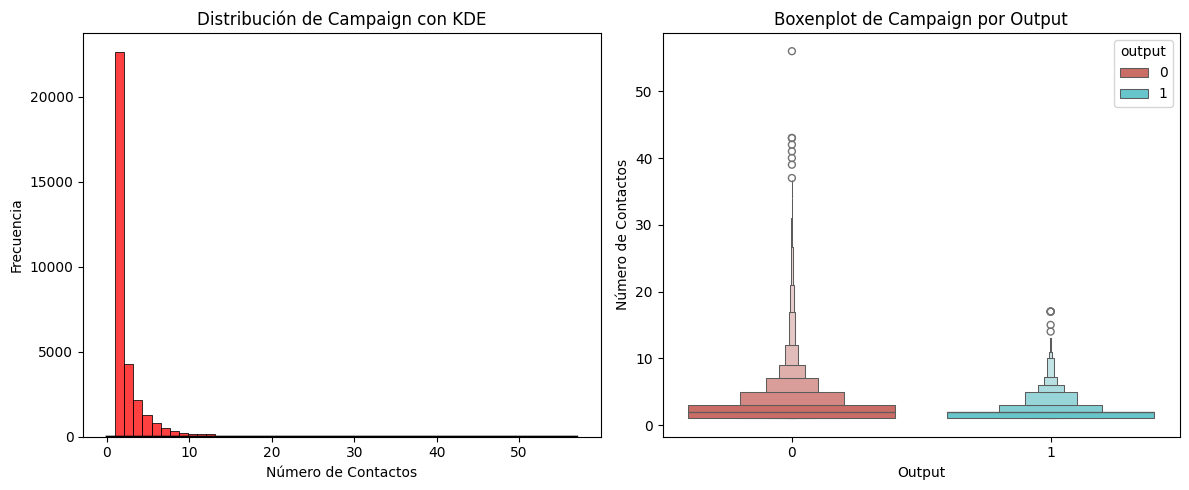

In [237]:
# Crear la figura y los ejes
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Histograma con KDE en ax1
sns.histplot(data=df, x='campaing', bins=50, color='red', ax=ax1)
sns.kdeplot(data=df, x='campaing', color='black', ax=ax1)
ax1.set_title('Distribución de Campaign con KDE')
ax1.set_xlabel('Número de Contactos')
ax1.set_ylabel('Frecuencia')

# Boxenplot en ax2
sns.boxenplot(data=df, y='campaing', x='output', hue='output', palette="hls", ax=ax2)
ax2.set_title('Boxenplot de Campaign por Output')
ax2.set_xlabel('Output')
ax2.set_ylabel('Número de Contactos')

# Ajustar el layout
plt.tight_layout()

# Mostrar los gráficos
plt.show()



In [238]:
df.groupby(["output","previous_label"])["campaing"].describe()

count   mean    std    min    25%    50%    75%  \
output previous_label                                                        
0      0              26060.0000 2.7124 2.9980 1.0000 1.0000 2.0000 3.0000   
       1               2856.0000 2.0487 1.5772 1.0000 1.0000 2.0000 2.0000   
       2                 95.0000 2.1368 1.4558 1.0000 1.0000 2.0000 3.0000   
       3                335.0000 2.1134 1.6969 1.0000 1.0000 2.0000 2.0000   
1      0               2526.0000 2.1916 1.8431 1.0000 1.0000 2.0000 3.0000   
       1                806.0000 1.7816 1.1065 1.0000 1.0000 1.0000 2.0000   
       2                130.0000 1.6615 1.0309 1.0000 1.0000 1.0000 2.0000   
       3                300.0000 1.7533 1.0628 1.0000 1.0000 1.0000 2.0000   

                          max  
output previous_label          
0      0              56.0000  
       1              16.0000  
       2               7.0000  
       3              13.0000  
1      0              17.0000  
       1              10.0000  
       2               6.0000  
       3               7.0000

### Categorización de `campaing` + Label Encoding
1) Se categoriza a cada cliente según el número de contactos realizados durante la campaña (`campaing`) y el estado de contacto anterior (`previous`):
   - **contacto_unico**: Si la campaña fue la primera y el cliente es nuevo.
   - **primer_contacto_campaing**: Si la campaña fue la primera , pero el cliente no es nuevo.
   - **contacto_multiple**: Si el número de campañas realizadas está entre 2 y 4.
   - **contacto_excesivo**: Si el número de campañas realizadas es mayor a 4.

In [239]:
# categorizando campaing
def categorize_campaing(row):
    if row["campaing"] == 1 and row["previous"] == 0:
        return 0
    elif row["campaing"] == 1 and row["previous"] != 0:
        return 1
    elif row["campaing"] > 1 and row["campaing"] <= 4:
        return 2
    else:
        return 3
    
# Aplicar a df
df["campaing_encoded"] = df.apply(categorize_campaing, axis=1)
df['campaing_encoded'].value_counts()

campaing_encoded
2    14960
0    11867
3     4012
1     2269
Name: count, dtype: int64

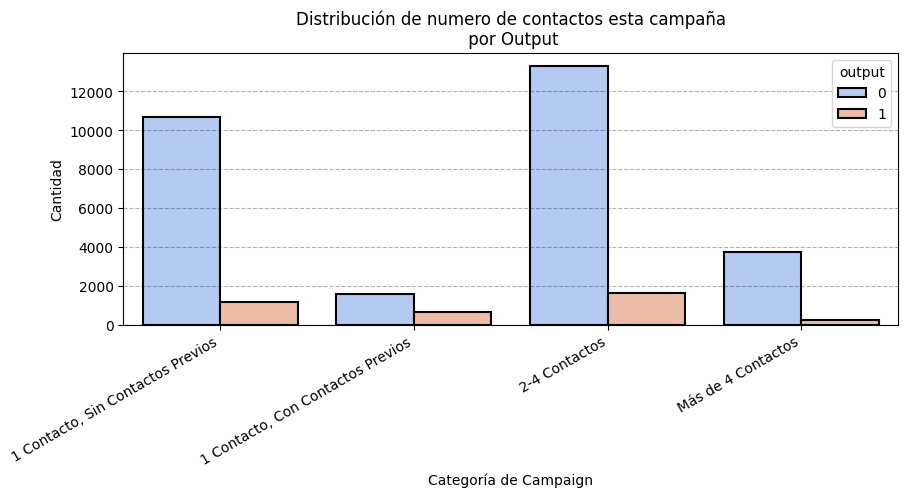

In [240]:
# Crear una figura con tamaño específico
plt.figure(figsize=(10, 4))

# Crear el gráfico de conteo para campaing_encoded
sns.countplot(
    x='campaing_encoded', 
    data=df, 
    hue='output', 
    linewidth=1.5, 
    edgecolor='black', 
    palette="coolwarm"
)

# Renombrar las etiquetas del eje X manualmente
plt.xticks(
    ticks=[0, 1, 2, 3], 
    labels=[
        "1 Contacto, Sin Contactos Previos", 
        "1 Contacto, Con Contactos Previos", 
        "2-4 Contactos", 
        "Más de 4 Contactos"
    ]
)

# Configurar título y etiquetas de los ejes
plt.title('Distribución de numero de contactos esta campaña\n por Output')
plt.xlabel('Categoría de Campaign')
plt.ylabel('Cantidad')
plt.grid(axis="y", linestyle='--', color="black", alpha=0.3)
plt.gcf().autofmt_xdate()

# Mostrar el gráfico
plt.show()

---

### **Clusters del Contexto Económico y Social + PCA** 📊


### 🟢 **Cluster 0: Economía en Crecimiento Fuerte**  
- **Razón:**  
  - 📈 Alta **creación de empleo**  
- **Indicadores Clave:**  
  - 🔹 `emp_var_rate`: Superior a la media en **+1298.6%**  
  - 🔹 `euribor_3m`: Superior a la media en **+33.1%**  


### 🔴 **Cluster 1: Economía en Recesión**  
- **Razón:**  
  - 📉 Muy baja **creación de empleo**  
- **Indicadores Clave:**  
  - 🔹 `emp_var_rate`: Inferior a la media en **-2656.4%**  
  - 🔹 `euribor_3m`: Inferior a la media en **-67.7%**  



---

### Correlación de Pearson de Variables del Contexto Económico


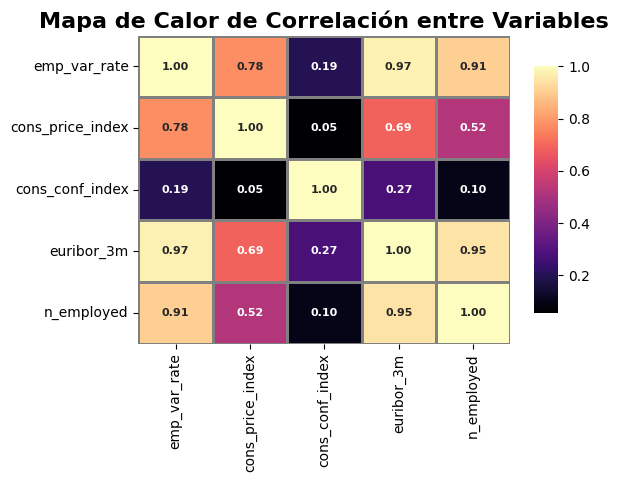

,emp_var_rate,cons_price_index,cons_conf_index,euribor_3m,n_employed
count,33108.0000,33108.0000,33108.0000,33108.0000,33108.0000
mean,0.0799,93.5751,-40.4912,3.6197,5166.9706
std,1.5735,0.5799,4.6289,1.7357,72.3291
min,-3.4000,92.2010,-50.8000,0.6340,4963.6000
25%,-1.8000,93.0750,-42.7000,1.3440,5099.1000
50%,1.1000,93.7490,-41.8000,4.8570,5191.0000
75%,1.4000,93.9940,-36.4000,4.9610,5228.1000
max,1.4000,94.7670,-26.9000,5.0450,5228.1000


In [241]:
# Crear la matriz de variables
matrix = df[["emp_var_rate", "cons_price_index", "cons_conf_index", "euribor_3m", "n_employed"]]

# Crear la figura
plt.figure(figsize=(6, 4))

# Crear el heatmap de correlación con mejoras visuales
sns.heatmap(
    matrix.corr(), 
    annot=True, 
    cmap='magma', 
    fmt=".2f", 
    linewidths=1,    # Añadir líneas divisorias entre celdas
    linecolor='gray',  # Color de las líneas divisorias
    annot_kws={"size": 8, "weight": "bold"},  # Tamaño y estilo de las anotaciones
    cbar_kws={"shrink": 0.8, "aspect": 10}  # Ajustar la barra de color
)

# Configurar el título del heatmap
plt.title('Mapa de Calor de Correlación entre Variables', fontsize=16, weight='bold')

# Mostrar el gráfico
plt.show()

matrix.describe()


### Realizamos PCA overfited buscando numero componentes óptimo

In [242]:
# Seleccionar variables
features = ["emp_var_rate", "cons_price_index", "cons_conf_index", 
            "euribor_3m", "n_employed"]
X = df[features]

# Estandarizar
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Varianza explicada por cada componente:
PC1: 0.694 (69.4%)
PC2: 0.197 (19.7%)
PC3: 0.102 (10.2%)
PC4: 0.005 (0.5%)
PC5: 0.002 (0.2%)


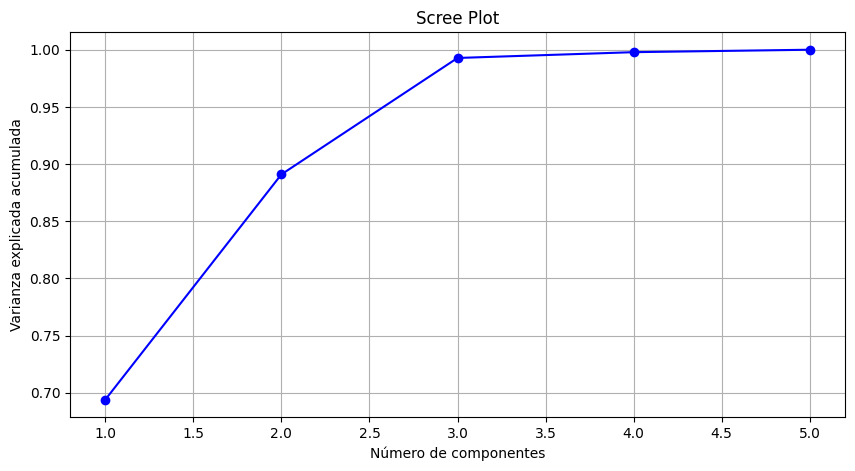

In [243]:
# Aplicar PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Mostrar varianza explicada
print("Varianza explicada por cada componente:")
for i, var in enumerate(pca.explained_variance_ratio_):
    print(f"PC{i+1}: {var:.3f} ({var*100:.1f}%)")

# Visualizar scree plot
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), 
         np.cumsum(pca.explained_variance_ratio_), 'bo-')
plt.xlabel('Número de componentes')
plt.ylabel('Varianza explicada acumulada')
plt.title('Scree Plot')
plt.grid(True)
plt.show()

### Aplicamos PCA con 3 componentes ya que explica el 99% de los datos.

In [244]:
# 3. Aplicar PCA y reducir a 3 componentes
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)

# 4. Añadir las componentes principales al DataFrame original
df['PC1'] = X_pca[:, 0]
df['PC2'] = X_pca[:, 1]
df['PC3'] = X_pca[:, 2]

# Ver la composición de las componentes principales
componentes_df = pd.DataFrame(
    pca.components_,
    columns=features,
    index=['PC1', 'PC2', 'PC3']
)
print("\nMatriz de componentes principales:")
print(componentes_df.round(3))


Matriz de componentes principales:
     emp_var_rate  cons_price_index  cons_conf_index  euribor_3m  n_employed
PC1        0.5320            0.4220           0.1290      0.5300      0.4920
PC2       -0.0460           -0.1910           0.9740      0.0510     -0.0960
PC3       -0.0120            0.8220           0.1180     -0.1820     -0.5260


### Aplicamos K-Means al PCA

In [245]:
# 5. Aplicar K-means para el clustering
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_pca)

# 6. Añadir las etiquetas descriptivas de los clusters por perfilado
cluster_labels = {
    0: 'Economía crecimiento fuerte',
    1: 'Economía en recesión',
}
df['Perfil_Economico'] = df['Cluster'].map(cluster_labels)
groupo_cluster = df.groupby("Perfil_Economico")["output"].mean()
df["Perfil_Economico_encoded"] = df["Perfil_Economico"].map(groupo_cluster)
df['Perfil_Economico_encoded'].value_counts()

Perfil_Economico_encoded
0.0483    22237
0.2473    10871
Name: count, dtype: int64

####   Interpretación del Coeficiente de Silueta (0.660)
- Indica que los puntos están bien agrupados en sus respectivos clusters y que hay una separación razonable entre los clusters.


=== Análisis de Silueta ===
Coeficiente de silueta promedio: 0.660


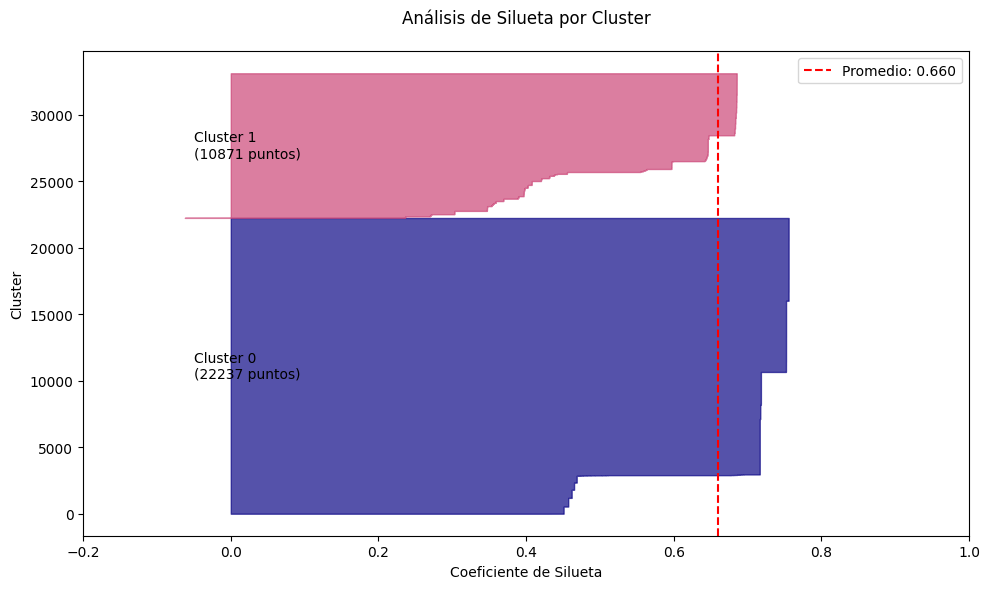

In [246]:
# ===== Aplicar K-means con 2 Clusters =====
kmeans = KMeans(n_clusters=2, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_pca)

# ===== Análisis de Silueta =====
def analizar_silueta_basico(X_pca, clusters, n_clusters=2):
    """
    Análisis básico de silueta usando los datos del PCA
    """
    # Calcular el coeficiente de silueta promedio
    silhouette_avg = silhouette_score(X_pca, clusters)
    print("\n=== Análisis de Silueta ===")
    print(f"Coeficiente de silueta promedio: {silhouette_avg:.3f}")
    
    # Calcular siluetas por punto
    sample_silhouette_values = silhouette_samples(X_pca, clusters)
    
    # Visualización de siluetas
    plt.figure(figsize=(10, 6))
    y_lower = 10
    
    for i in range(n_clusters):
        # Obtener los valores de silueta para el cluster i
        ith_cluster_silhouette_values = sample_silhouette_values[clusters == i]
        ith_cluster_silhouette_values.sort()
        
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        
        color = plt.cm.plasma(float(i) / n_clusters)
        plt.fill_betweenx(np.arange(y_lower, y_upper),
                        0, ith_cluster_silhouette_values,
                        facecolor=color, edgecolor=color, alpha=0.7)
        
        # Añadir etiqueta del cluster con su tamaño
        plt.text(-0.05, y_lower + 0.5 * size_cluster_i, 
                f'Cluster {i}\n({size_cluster_i} puntos)', 
                verticalalignment='center')
        
        y_lower = y_upper + 10
    
    # Añadir línea de promedio y mejorar la visualización
    plt.axvline(x=silhouette_avg, color="red", linestyle="--", 
                label=f'Promedio: {silhouette_avg:.3f}')
    plt.title("Análisis de Silueta por Cluster", pad=20)
    plt.xlabel("Coeficiente de Silueta")
    plt.ylabel("Cluster")
    
    # Ajustar los límites del eje x para mejor visualización
    plt.xlim(-0.2, 1)
    plt.legend(loc='upper right')
    
    # Ajustar diseño
    plt.tight_layout()
    plt.show()
    
    return silhouette_avg, sample_silhouette_values

# Ejecutar el análisis
sil_avg, sil_values = analizar_silueta_basico(X_pca, df['Cluster'])

#### Visualización del `PCA` + `Clusters`

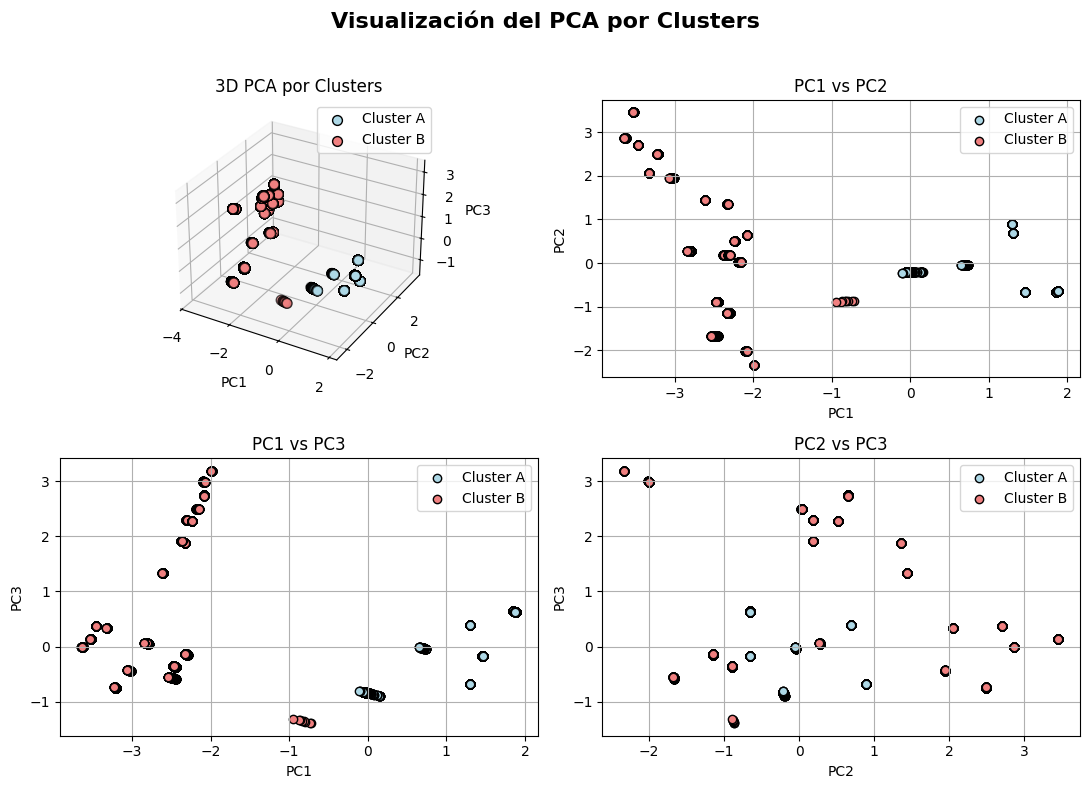

In [247]:
# ===== Crear una copia del DataFrame para el análisis =====
df_viz = df.copy()

# ===== Aplicar PCA a la copia =====
pca_viz = PCA(n_components=3)
X_pca_viz = pca_viz.fit_transform(X_scaled)

# Añadir las componentes principales al DataFrame de visualización
df_viz['PC1_viz'] = X_pca_viz[:, 0]
df_viz['PC2_viz'] = X_pca_viz[:, 1]
df_viz['PC3_viz'] = X_pca_viz[:, 2]

# ===== Aplicar K-Means a la copia =====
kmeans_viz = KMeans(n_clusters=2, random_state=42)
df_viz['Cluster_viz'] = kmeans_viz.fit_predict(X_pca_viz)

# ===== Colores y etiquetas para los clusters =====
colors_viz = ['lightblue', 'lightcoral']
cluster_labels_viz = ['Cluster A', 'Cluster B']

# ===== Crear la figura con subplots =====
fig = plt.figure(figsize=(11, 8))
plt.suptitle('Visualización del PCA por Clusters', fontsize=16, fontweight='bold')

# ===== Gráfico de Dispersión 3D =====
ax1 = fig.add_subplot(2, 2, 1, projection='3d')
for cluster in df_viz['Cluster_viz'].unique():
    ax1.scatter(
        df_viz['PC1_viz'][df_viz['Cluster_viz'] == cluster],
        df_viz['PC2_viz'][df_viz['Cluster_viz'] == cluster],
        df_viz['PC3_viz'][df_viz['Cluster_viz'] == cluster],
        c=colors_viz[cluster],
        label=cluster_labels_viz[cluster],
        edgecolor='k',
        s=50
    )
ax1.set_xlabel('PC1')
ax1.set_ylabel('PC2')
ax1.set_zlabel('PC3')
ax1.set_title('3D PCA por Clusters')
ax1.legend()

# ===== Gráfico de Dispersión 2D: PC1 vs PC2 =====
ax2 = plt.subplot(2, 2, 2)
for cluster in df_viz['Cluster_viz'].unique():
    plt.scatter(
        df_viz['PC1_viz'][df_viz['Cluster_viz'] == cluster],
        df_viz['PC2_viz'][df_viz['Cluster_viz'] == cluster],
        c=colors_viz[cluster],
        label=cluster_labels_viz[cluster],
        edgecolor='k'
    )
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PC1 vs PC2')
plt.grid(True)
plt.legend()

# ===== Gráfico de Dispersión 2D: PC1 vs PC3 =====
ax3 = plt.subplot(2, 2, 3)
for cluster in df_viz['Cluster_viz'].unique():
    plt.scatter(
        df_viz['PC1_viz'][df_viz['Cluster_viz'] == cluster],
        df_viz['PC3_viz'][df_viz['Cluster_viz'] == cluster],
        c=colors_viz[cluster],
        label=cluster_labels_viz[cluster],
        edgecolor='k'
    )
plt.xlabel('PC1')
plt.ylabel('PC3')
plt.title('PC1 vs PC3')
plt.grid(True)
plt.legend()

# ===== Gráfico de Dispersión 2D: PC2 vs PC3 =====
ax4 = plt.subplot(2, 2, 4)
for cluster in df_viz['Cluster_viz'].unique():
    plt.scatter(
        df_viz['PC2_viz'][df_viz['Cluster_viz'] == cluster],
        df_viz['PC3_viz'][df_viz['Cluster_viz'] == cluster],
        c=colors_viz[cluster],
        label=cluster_labels_viz[cluster],
        edgecolor='k'
    )
plt.xlabel('PC2')
plt.ylabel('PC3')
plt.title('PC2 vs PC3')
plt.grid(True)
plt.legend()

# ===== Ajustar el layout y mostrar el gráfico =====
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Ajustar para que el título no se sobreponga
plt.show()


#### Análisis de los clusters

In [248]:
# Mostrar el tamaño de cada cluster
print("\nTamaño de cada cluster:")
print(df['Cluster'].value_counts())

# Análisis de características distintivas por cluster
print("\nCaracterísticas distintivas por cluster:")
for cluster in range(2):
    print(f"\nCluster {cluster}:")
    cluster_mean = df[df['Cluster'] == cluster][features].mean()
    total_mean = df[features].mean()
    diff = (cluster_mean - total_mean) / total_mean * 100
    
    for feature, pct_diff in diff.items():
        if abs(pct_diff) > 10:
            print(f"{feature}: {'superior' if pct_diff > 0 else 'inferior'} "
                  f"a la media en {abs(pct_diff):.1f}%")


Tamaño de cada cluster:
Cluster
0    22237
1    10871
Name: count, dtype: int64

Características distintivas por cluster:

Cluster 0:
emp_var_rate: superior a la media en 1298.6%
euribor_3m: superior a la media en 33.1%

Cluster 1:
emp_var_rate: inferior a la media en 2656.4%
euribor_3m: inferior a la media en 67.7%


### Perfilado de los centroides

Rangos de Variables:
--------------------------------------------------------------------------------
        Variable       Min       Max
    emp_var_rate   -3.4000    1.4000
cons_price_index   92.2010   94.7670
 cons_conf_index  -50.8000  -26.9000
      euribor_3m    0.6340    5.0450
      n_employed 4963.6000 5228.1000
--------------------------------------------------------------------------------


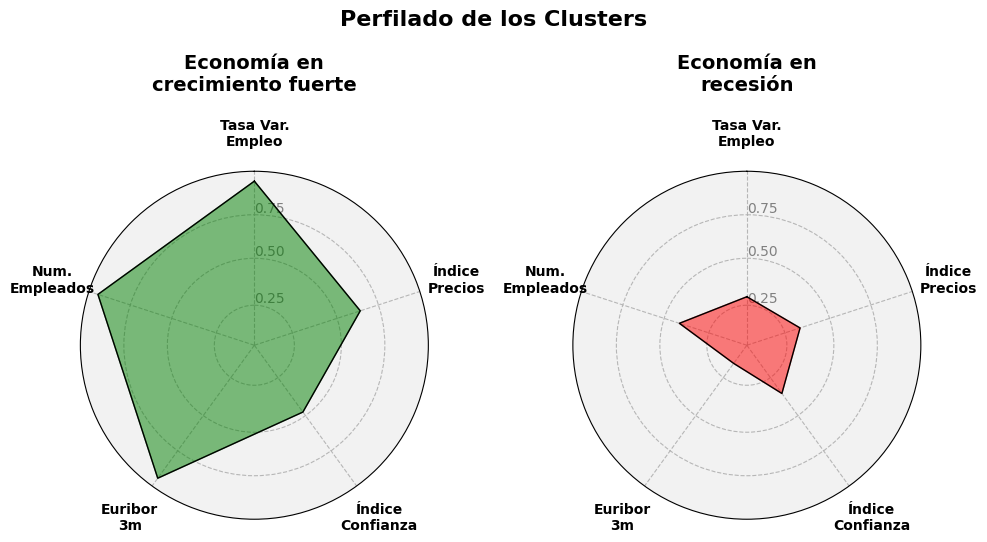

In [249]:
from math import pi
# Asegurarnos de tener los centroides en el espacio original
centroids_original = pca.inverse_transform(kmeans.cluster_centers_)
centroids_original = scaler.inverse_transform(centroids_original)

# Crear DataFrame de centroides para 2 clusters
centroids_df = pd.DataFrame(
    centroids_original,
    columns=["emp_var_rate", "cons_price_index", "cons_conf_index", 
            "euribor_3m", "n_employed"],
    index=[f'Cluster {i}' for i in range(2)]
)

# Definir las variables originales que estás usando
columns = ["emp_var_rate", "cons_price_index", "cons_conf_index", 
            "euribor_3m", "n_employed"]

# Diccionario para etiquetas más legibles
column_labels = {
    "emp_var_rate": "Tasa Var.\nEmpleo",
    "cons_price_index": "Índice\nPrecios",
    "cons_conf_index": "Índice\nConfianza",
    "euribor_3m": "Euribor\n3m",
    "n_employed": "Num.\nEmpleados"
}

# Títulos para cada cluster
titles = {
    0: 'Economía en\ncrecimiento fuerte',
    1: 'Economía en\nrecesión'
}

# Función para analizar rangos de variables
def print_variable_ranges(df, centroides, columns_to_analyze):
    ranges_df = pd.DataFrame({
        'Variable': columns_to_analyze,
        'Min': [df[col].min() for col in columns_to_analyze],
        'Max': [df[col].max() for col in columns_to_analyze]
    })
    pd.set_option('display.float_format', lambda x: '%.4f' % x)
    print("Rangos de Variables:")
    print("-" * 80)
    print(ranges_df.to_string(index=False))
    print("-" * 80)

# Imprimir rangos
print_variable_ranges(df, centroids_df, columns)

# Normalización de los centroides
resultado_normalizado = centroids_df.copy()

for col in columns:
    min_val = df[col].min()
    max_val = df[col].max()
    resultado_normalizado[col] = (resultado_normalizado[col] - min_val) / (max_val - min_val)

# Configuración de la visualización
plt.figure(figsize=(10, 5))
plt.subplots_adjust(wspace=0.4)
plt.suptitle('Perfilado de los Clusters', fontsize=16, y=1.05,fontweight='bold')

bg_colors = [to_rgba('gray', alpha=0.1), to_rgba('gray', alpha=0.1)] 
colors = ['green', 'red']

for row in range(2):
    ax = plt.subplot(1, 2, row + 1, polar=True)
    ax.set_facecolor(bg_colors[row])
    
    # Crear categorías y ángulos
    categories = [column_labels[col] for col in columns]
    N = len(categories)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]
    
    # Configuración del gráfico polar
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)
    ax.grid(True, linestyle='--', alpha=0.9)
    ax.set_axisbelow(True)
    
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(categories, size=10, fontweight='bold')
    ax.tick_params(pad=17)
    
    ax.set_rlabel_position(0)
    ax.set_rticks([0.23, 0.5, 0.75])
    ax.set_yticklabels(["0.25", "0.50", "0.75"], color="grey", size=10)
    plt.ylim(0, 1)
    
    # Obtener valores normalizados y cerrar el círculo
    values = resultado_normalizado.iloc[row].values.tolist()
    values += values[:1]
    
    # Dibujar el gráfico
    ax.plot(angles, values, linewidth=1, linestyle='solid', color="black")
    ax.fill(angles, values, color=colors[row], alpha=0.5)
    
    # Título para cada subplot
    plt.title(titles[row], size=14, pad=20, fontweight='bold')

# Ajustar el layout
plt.tight_layout()
plt.show()


---

### Filtrado de variables para el modelo

In [250]:
# Lista de nombres de las variables
df_encoded = df[[
    "contact_encoded",
    "job_encoded",
    "education_level_encoded",
    "month_encoded",
    "day_of_week_encoded",
    "age_encoded",
    "status_marital_default",
    "status_marital_housing",
    "status_marital_loan",
    "poutcome_encoded",
    "previous_label",
    "pdays_encoded",
    "campaing_encoded",
    "Perfil_Economico_encoded",
    "PC1", "PC2", "PC3",
]]
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33108 entries, 0 to 33107
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   contact_encoded           33108 non-null  float64
 1   job_encoded               33108 non-null  float64
 2   education_level_encoded   33108 non-null  float64
 3   month_encoded             33108 non-null  int64  
 4   day_of_week_encoded       33108 non-null  int64  
 5   age_encoded               33108 non-null  int64  
 6   status_marital_default    33108 non-null  float64
 7   status_marital_housing    33108 non-null  float64
 8   status_marital_loan       33108 non-null  float64
 9   poutcome_encoded          33108 non-null  float64
 10  previous_label            33108 non-null  int64  
 11  pdays_encoded             33108 non-null  float64
 12  campaing_encoded          33108 non-null  int64  
 13  Perfil_Economico_encoded  33108 non-null  float64
 14  PC1   

### Correlación de las variables participantes del modelo.

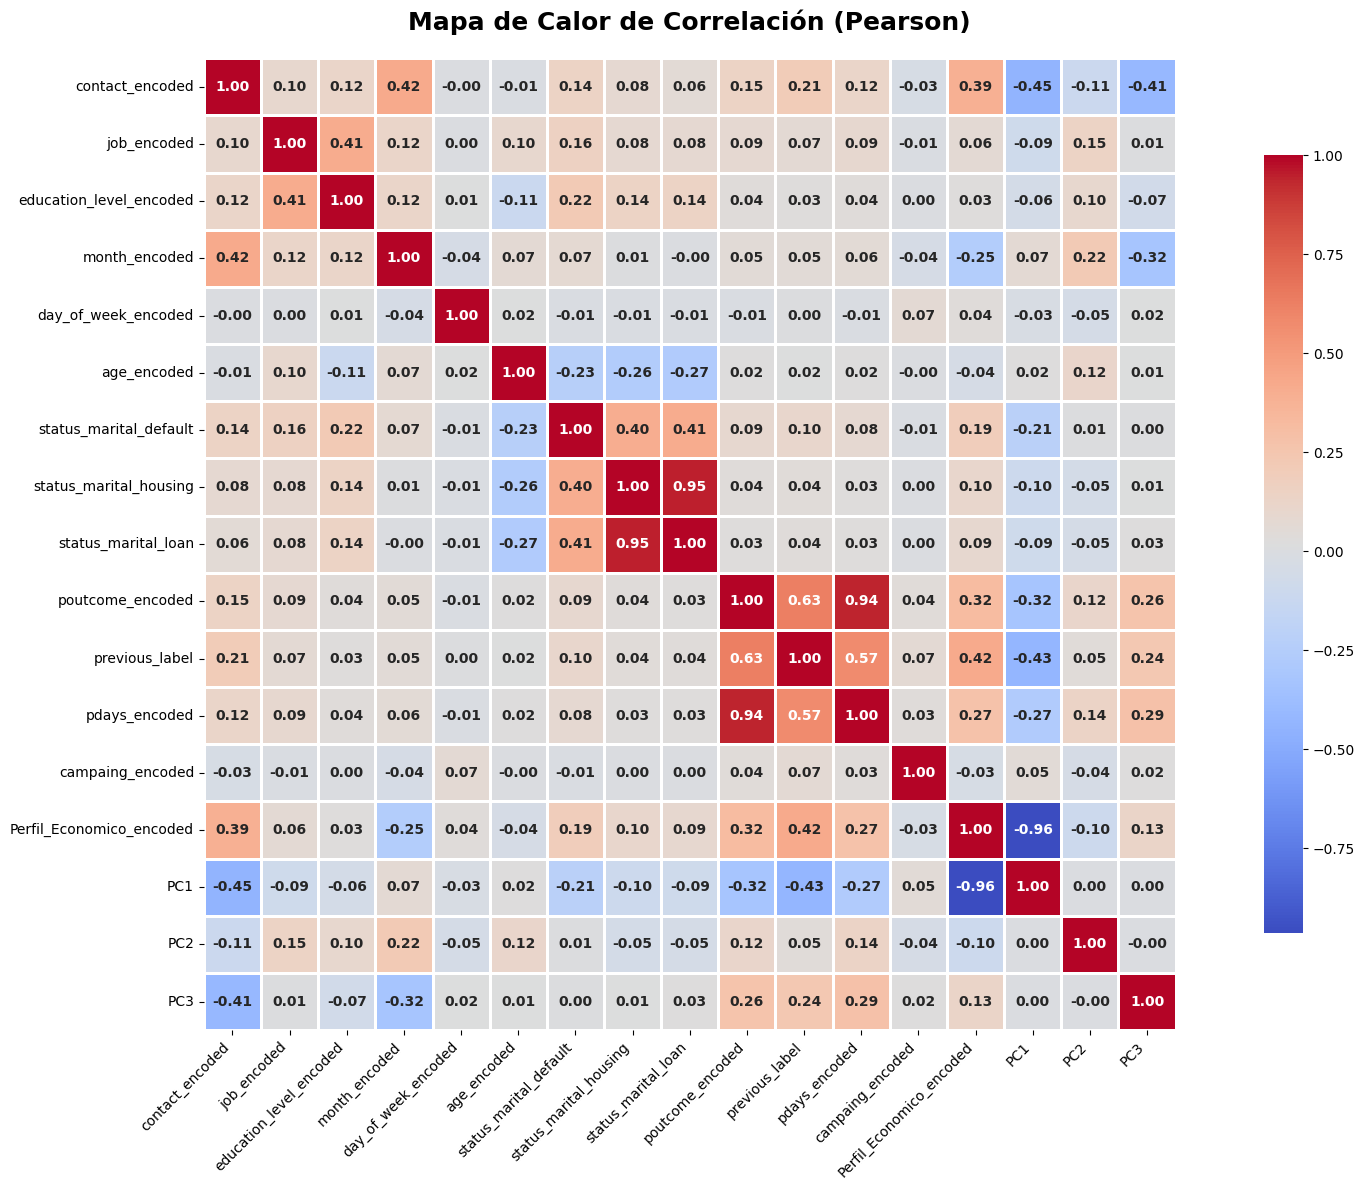

In [251]:
# Calcular la matriz de correlación
matriz = df_encoded.corr('pearson')

# Crear una figura de mayor tamaño
plt.figure(figsize=(18, 12))

# Crear el heatmap con mejoras visuales
sns.heatmap(
    matriz,
    cmap='coolwarm',                            # Colormap para colores divergentes
    annot=True,                                 # Mostrar valores de correlación
    fmt=".2f",                                  # Formato de los valores
    linewidths=1,                               # Líneas divisorias entre celdas
    linecolor='white',                          # Color de las líneas divisorias
    cbar_kws={"shrink": 0.8},                   # Ajustar tamaño de la barra de color
    annot_kws={"size": 10, "weight": "bold"},   # Tamaño y estilo de las anotaciones
    square=True                                 # Hacer que las celdas sean cuadradas
)

# Título del heatmap
plt.title('Mapa de Calor de Correlación (Pearson)', fontsize=18, weight='bold', pad=20)

# Ajustar los nombres de las etiquetas del eje X e Y para que no se solapen
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)

# Mostrar el gráfico
plt.tight_layout()
plt.show()


### Preparación de los Datos para el Entrenamiento de Modelos

In [252]:
# 4. Preparar datos para el modelo
X = df_encoded
y = df['output']

# 5. Split y entrenamiento
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y = df['output']

### Logistic Regression

In [253]:
LogisticRegression_model = LogisticRegression(random_state=42)
LogisticRegression_model.fit(X_train, y_train)
y_pred = LogisticRegression_model.predict(X_test)
y_pred_proba = LogisticRegression_model.predict_proba(X_test)

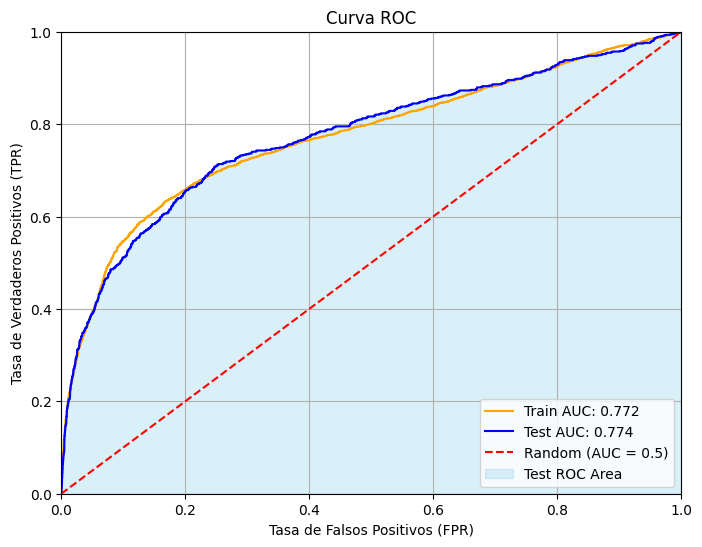

In [254]:
# Calcular la curva ROC para los datos de entrenamiento
y_train_proba = LogisticRegression_model.predict_proba(X_train)[:, 1]
fpr_train, tpr_train, _ = roc_curve(y_train, y_train_proba)
auc_train = roc_auc_score(y_train, y_train_proba)

# Calcular la curva ROC para los datos de prueba
fpr_test, tpr_test, _ = roc_curve(y_test, y_pred_proba[:, 1])
auc_test = roc_auc_score(y_test, y_pred_proba[:, 1])

# Graficar la curva ROC con el estilo deseado
plt.figure(figsize=(8, 6))

# Curva para entrenamiento
plt.plot(fpr_train, tpr_train, label=f'Train AUC: {auc_train:.3f}', color='orange')

# Curva para prueba
plt.plot(fpr_test, tpr_test, label=f'Test AUC: {auc_test:.3f}', color='blue')

# Línea de referencia aleatoria
plt.plot([0, 1], [0, 1], linestyle='--', color='red', label='Random (AUC = 0.5)')

# Área sombreada debajo de la curva de prueba
plt.fill_between(fpr_test, tpr_test, color='skyblue', alpha=0.3, label='Test ROC Area')

# Configuración del gráfico
plt.title('Curva ROC')
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


In [255]:
# Extraer los coeficientes del modelo
coeficientes = LogisticRegression_model.coef_[0]  # Para problemas binarios, se usa la primera fila
variables = X.columns  # Nombres de las columnas utilizadas como predictores

# Crear un DataFrame para organizar la información
importancia_variables = pd.DataFrame({
    'Variable': variables,
    'Coeficiente': coeficientes
})

# Ordenar por la magnitud de los coeficientes
importancia_variables['Importancia_Absoluta'] = np.abs(importancia_variables['Coeficiente'])
importancia_variables = importancia_variables.sort_values(by='Importancia_Absoluta', ascending=False)

# Mostrar las principales variables influyentes
print(importancia_variables)

                    Variable  Coeficiente  Importancia_Absoluta
0            contact_encoded       5.2720                5.2720
1                job_encoded       2.7292                2.7292
6     status_marital_default       2.0011                2.0011
11             pdays_encoded       1.9908                1.9908
9           poutcome_encoded       1.2475                1.2475
2    education_level_encoded       1.1192                1.1192
16                       PC3       0.5250                0.5250
14                       PC1      -0.3491                0.3491
10            previous_label      -0.2589                0.2589
8        status_marital_loan       0.2251                0.2251
7     status_marital_housing       0.1841                0.1841
15                       PC2       0.1679                0.1679
12          campaing_encoded      -0.0628                0.0628
4        day_of_week_encoded      -0.0557                0.0557
5                age_encoded       0.016

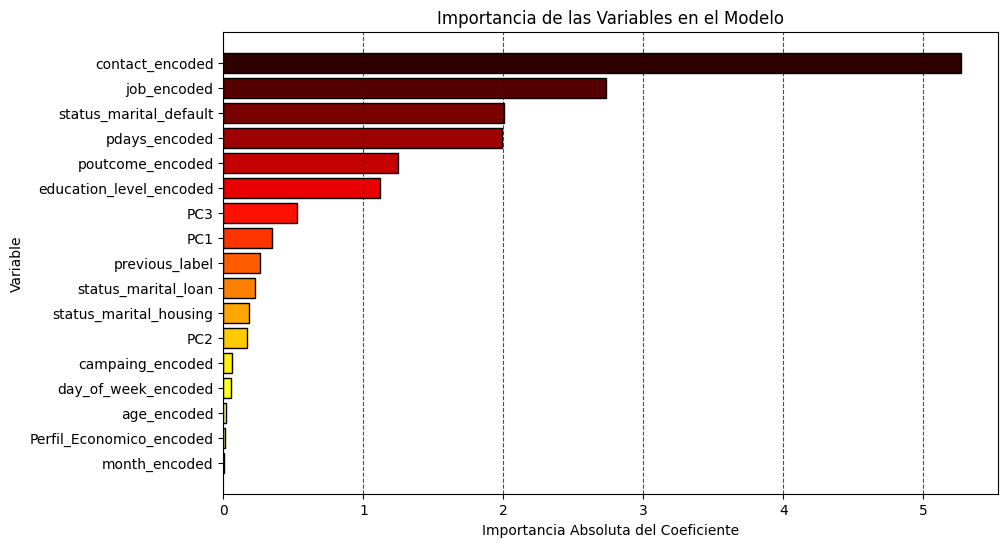

In [256]:
plt.figure(figsize=(10, 6))
# Extraer colores de la paleta 'hls' según el número de variables
num_variables = len(importancia_variables['Variable'])
palette = sns.color_palette("hot", num_variables)

# Crear el gráfico de barras horizontales con la paleta 'hls'
plt.barh(
    importancia_variables['Variable'], 
    importancia_variables['Importancia_Absoluta'], 
    color=palette, 
    edgecolor='black'
)

# Configurar etiquetas y título
plt.xlabel('Importancia Absoluta del Coeficiente')
plt.ylabel('Variable')
plt.title('Importancia de las Variables en el Modelo')

# Invertir el eje Y para que las variables más importantes estén arriba
plt.gca().invert_yaxis()

# Agregar una cuadrícula
plt.grid(True, linestyle='--',axis="x",color="black", alpha=0.7)

# Mostrar el gráfico
plt.show()

### Random_Forest + Grid Search

In [257]:
# Crear y entrenar el modelo Random Forest Regressor
RandomForest_model = RandomForestRegressor(
    n_estimators=300,
    max_depth=9,
    min_samples_leaf=5,
    min_samples_split=35,
    max_features='log2',
    max_samples=0.9,
    random_state=42
)

# Entrenar el modelo
RandomForest_model.fit(X_train, y_train)
# Validación cruzada con MSE negativo (se convierte en positivo para interpretarlo)
cv_scores = cross_val_score(RandomForest_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

# Mostrar el RMSE promedio y desviación estándar
print(f"RMSE promedio en CV: {(-cv_scores.mean()) ** 0.5:.4f}")
print(f"Desviación estándar del RMSE en CV: {cv_scores.std() ** 0.5:.4f}")

RMSE promedio en CV: 0.2770
Desviación estándar del RMSE en CV: 0.0394


In [258]:
# Predecir valores continuos para entrenamiento y prueba
y_train_proba = RandomForest_model.predict(X_train)
y_test_proba = RandomForest_model.predict(X_test)

# Asegurarse de que las predicciones estén en el rango [0, 1]
y_train_proba = np.clip(y_train_proba, 0, 1)
y_test_proba = np.clip(y_test_proba, 0, 1)

# Calcular la curva ROC para los datos de entrenamiento
fpr_train, tpr_train, _ = roc_curve(y_train, y_train_proba)
auc_train = roc_auc_score(y_train, y_train_proba)

# Calcular la curva ROC para los datos de prueba
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_proba)
auc_test = roc_auc_score(y_test, y_test_proba)

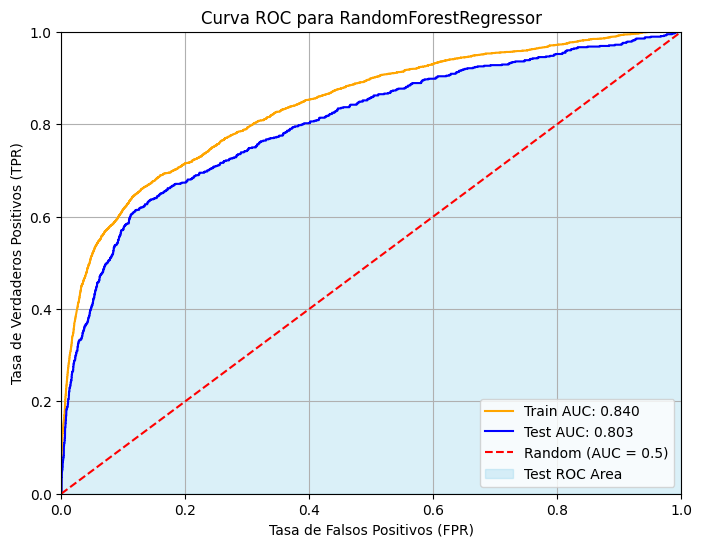

In [259]:
# Graficar la curva ROC con el estilo deseado
plt.figure(figsize=(8, 6))

# Curva para entrenamiento
plt.plot(fpr_train, tpr_train, label=f'Train AUC: {auc_train:.3f}', color='orange')

# Curva para prueba
plt.plot(fpr_test, tpr_test, label=f'Test AUC: {auc_test:.3f}', color='blue')

# Línea de referencia aleatoria
plt.plot([0, 1], [0, 1], linestyle='--', color='red', label='Random (AUC = 0.5)')

# Área sombreada debajo de la curva de prueba
plt.fill_between(fpr_test, tpr_test, color='skyblue', alpha=0.3, label='Test ROC Area')

# Configuración del gráfico
plt.title('Curva ROC para RandomForestRegressor')
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.legend(loc='lower right')
plt.grid(True)

# Mostrar el gráfico
plt.show()


Métricas detalladas:
Verdaderos Negativos (TN): 5787
Falsos Positivos (FP): 88
Falsos Negativos (FN): 570
Verdaderos Positivos (TP): 177


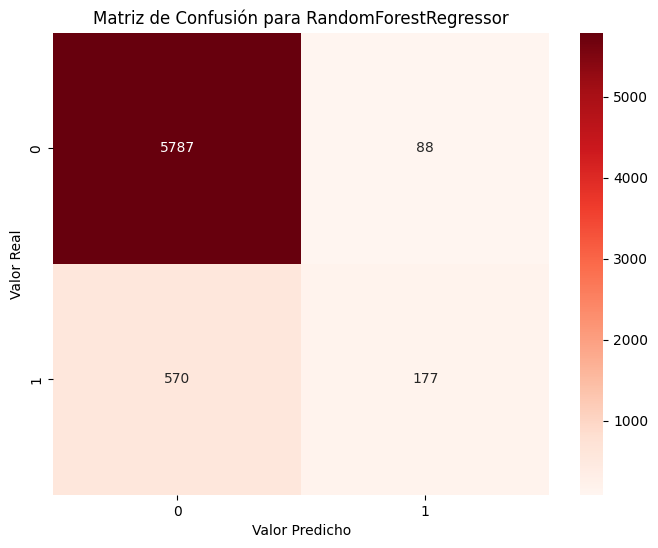

In [260]:
# Predecir probabilidades (valores continuos)
y_pred_proba = RandomForest_model.predict(X_test)

# Convertir probabilidades en clases binarias (0 o 1) con umbral de 0.5
y_pred = (y_pred_proba >= 0.5).astype(int)

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

# Desglose de la matriz de confusión
tn, fp, fn, tp = conf_matrix.ravel()
print("Métricas detalladas:")
print(f"Verdaderos Negativos (TN): {tn}")
print(f"Falsos Positivos (FP): {fp}")
print(f"Falsos Negativos (FN): {fn}")
print(f"Verdaderos Positivos (TP): {tp}")

# Visualizar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds')
plt.title('Matriz de Confusión para RandomForestRegressor')
plt.ylabel('Valor Real')
plt.xlabel('Valor Predicho')
plt.show()


                    Variable  Importancia
16                       PC3       0.1917
14                       PC1       0.1680
15                       PC2       0.1382
9           poutcome_encoded       0.1362
11             pdays_encoded       0.1311
13  Perfil_Economico_encoded       0.0706
3              month_encoded       0.0275
5                age_encoded       0.0257
0            contact_encoded       0.0221
4        day_of_week_encoded       0.0191
10            previous_label       0.0159
12          campaing_encoded       0.0127
1                job_encoded       0.0099
2    education_level_encoded       0.0087
7     status_marital_housing       0.0084
8        status_marital_loan       0.0073
6     status_marital_default       0.0070


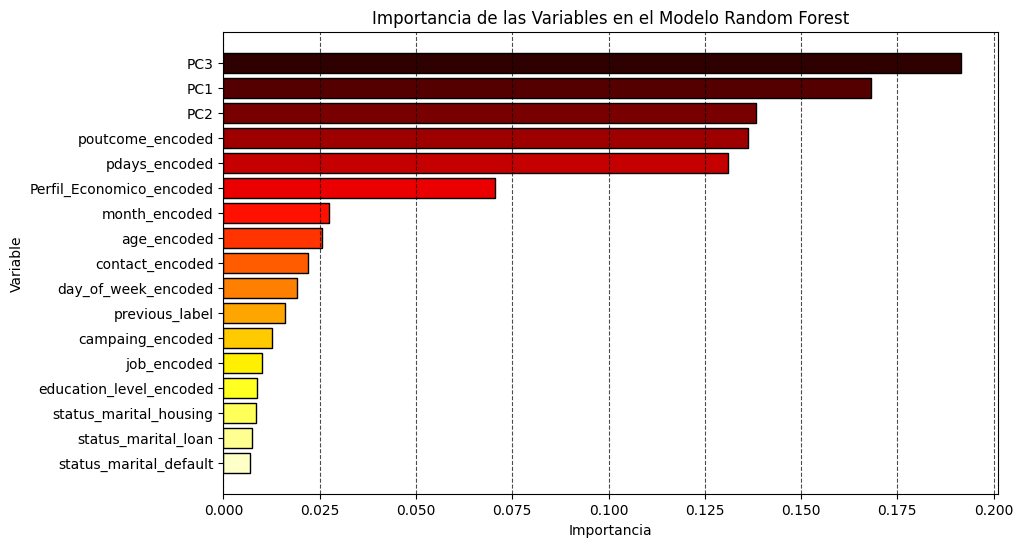

In [261]:
# Obtener las importancias de las características
importancias = RandomForest_model.feature_importances_

# Asociar las importancias a los nombres de las columnas
importancia_variables = pd.DataFrame({
    'Variable': X_train.columns,
    'Importancia': importancias
})

# Ordenar por importancia
importancia_variables = importancia_variables.sort_values(by='Importancia', ascending=False)

# Mostrar las más importantes
print(importancia_variables)

# Crear el gráfico de barras con la paleta 'viridis'
plt.figure(figsize=(10, 6))

# Extraer colores de la paleta 'viridis' según el número de variables
num_variables = len(importancia_variables['Variable'])
colors = sns.color_palette('hot', num_variables)

# Crear el gráfico de barras horizontales
plt.barh(
    importancia_variables['Variable'],
    importancia_variables['Importancia'],
    color=colors,
    edgecolor='black'
)

# Configurar etiquetas y título
plt.xlabel('Importancia')
plt.ylabel('Variable')
plt.title('Importancia de las Variables en el Modelo Random Forest')

# Invertir el eje Y para que las más importantes estén arriba
plt.gca().invert_yaxis()

# Agregar una cuadrícula en el eje X
plt.grid(axis='x', linestyle='--',color="black",  alpha=0.7)

# Mostrar el gráfico
plt.show()